# Промышленность.

## Описание проекта:

Проект направлен на иссследование возможности снижения издержек производства металлургического комбината.

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. 

####  Описание этапа обработки.

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

## Описание данных:

Данные состоят из файлов, полученных из разных источников:
- data_arc_new.csv — данные об электродах;
- data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
- data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
- data_gas_new.csv — данные о продувке сплава газом;
- data_temp_new.csv — результаты измерения температуры;
- data_wire_new.csv — данные о проволочных материалах (объём);
- data_wire_time_new.csv — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

## Этапы проекта (план работы):

**1. Первичный анализ данных и план проекта:**
 - Выгрузка и изучение данных 
 - Графический анализ
 - Если есть проблемы и аномалии в данных, описать идеи для их учёта/устранения/исправления выявленных в данных 
 - План работ по всему проекту (3–5 основных шагов)
 - Вопросы по моделируемому процессу для бизнеса

**2. Предобработка данных:**
 - работа с пропусками (удаление, замена пропусков)
 - удаление аномалий
 - проверка типов данных, при необходимости изменение
 - генерация новых признаков
 - агрегирование по ключу key
 
**3. Разработка и построение модели:**
 - формирование объединенного датафрейма
 - исследование объединенного датафрейма, предобработка (с учетом используемых моделей)
 - разделение на выборки для обучения и тестирования
 - масштабирование (при необходимости)
 - определение признаков и целевого признака
 - выбор метрики оценки качества модели
 - подбор гиперпараметров
 - получение метрики на кросс-валидации
 - построение 3-4 моделей, выбор лучшей
 - тестирование лучшей модели на тестовой выборке
 - исследование важности признаков
 
**4. Отчет, итоговые выводы**


## Цель проекта:

Построение прототипа модели машинного обучения, которая предскажет температуру стали перед введением легирующих добавок.

## Импорт данных

In [1]:
#!pip install matplotlib --user

In [2]:
#!pip install scikit-learn==1.1.3 --user

In [3]:
#!pip install catboost

In [4]:
#!pip install --upgrade matplotlib skimpy seaborn lightgbm

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from IPython.display import display, HTML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler 
#from sklearn.preprocessing import OrdinalEncoder 
#from sklearn.metrics import roc_curve 
#from sklearn.metrics import roc_auc_score 
from sklearn.utils import shuffle
#from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
from sklearn. model_selection import RepeatedKFold

import time
import warnings
warnings.filterwarnings('ignore')
import math

In [6]:
RANDOM_STATE = 190623

## Исследовательский анализ данных

### Данные об электродах

In [7]:
try:
    data_arc = pd.read_csv('/datasets/data_arc_new.csv')
except:
    data_arc = pd.read_csv('data_arc_new.csv') 

In [8]:
display(data_arc.head())
display(data_arc.tail()) # последние 5 строк
data_arc.info()
data_arc.describe()

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
14871  3241  2019-09-06 16:49:05  2019-09-06 16:51:42           0.439735   
14872  3241  2019-09-06 16:55:11  2019-09-06 16:58:11           0.646498   
14873  3241  2019-09-06 17:06:48  2019-09-06 17:09:52           1.039726   
14874  3241  2019-09-06 17:21:58  2019-09-06 17:22:55           0.530267   
14875  3241  2019-09-06 17:24:54  2019-09-06 17:26:15           0.389057   

       Реактивная мощность  
14871             0.299579  
14872             0.458240  
14873             0.769302  
14874             0.361543  
14875             0.251347

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.662752             0.438986
std      934.571502           0.258885             5.873485
min        1.000000           0.223120          -715.479924
25%      806.000000           0.467115             0.337175
50%     1617.000000           0.599587             0.441639
75%     2429.000000           0.830070             0.608201
max     3241.000000           1.463773             1.270284

In [9]:
data_arc.duplicated().sum()

0

In [10]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [12]:
data_arc['key'].value_counts()
# для каждой итерации несколько строк с одинаковыми key - по несколько итераций каждой партии

2108    16
1513    15
1689    15
2567    14
46      13
        ..
112      1
2472     1
2025     1
3059     1
1615     1
Name: key, Length: 3214, dtype: int64

In [13]:
data_arc['key'].value_counts().count()
# всего номеров партий/ключей

3214

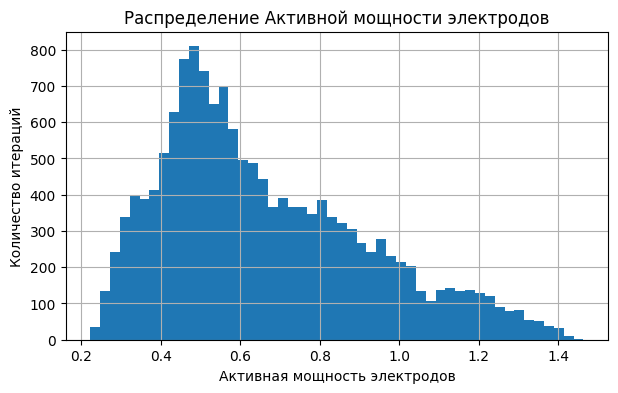

In [14]:
data_arc['Активная мощность'].hist(bins=50, grid=True, figsize=(7,4))
plt.title('Распределение Активной мощности электродов')
plt.xlabel('Активная мощность электродов')
plt.ylabel('Количество итераций');

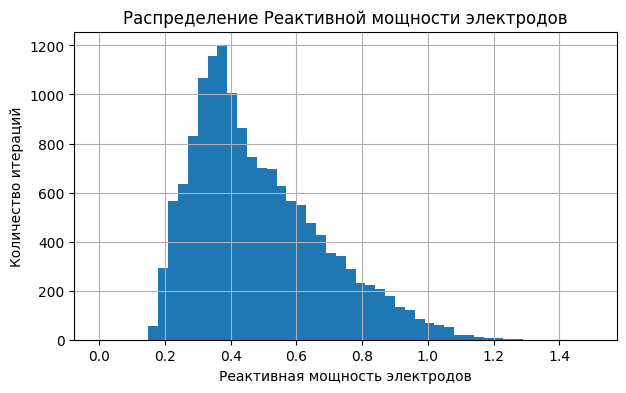

In [15]:
 # установим интервал значений больше 0
data_arc['Реактивная мощность'].hist(bins=50, grid=True, range=(0, 1.5), figsize=(7,4))
# к тому же - есть выброс в виде отрицательного значения (определился как минимум)
plt.title('Распределение Реактивной мощности электродов')
plt.xlabel('Реактивная мощность электродов')
plt.ylabel('Количество итераций');

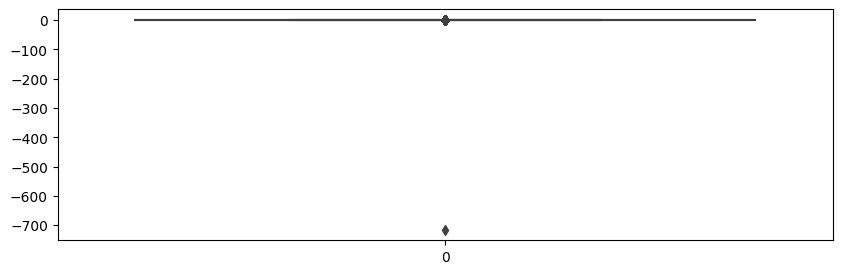

In [16]:
# посмотрим распределение реактивной мощности на ящике с усами
plt.figure(figsize=(10,3))
sns.boxplot(data_arc['Реактивная мощность']);
# выброс - одно отрицательное значение (min -715,479924)

In [17]:
# переведем столбец 'Реактивная мощность' в список для подсчета строк с отрицательными значениями
data_arc_neg = data_arc['Реактивная мощность'].tolist()
#data_arc_neg

In [18]:
data_arc_neg_count = sum(1 for x in data_arc_neg if x < 0)
data_arc_neg_count

1

In [19]:
# одна строка с отрицательным значением Реактивной мощности, посмотрим в какой партии присутствует эта запись
data_arc_neg_key = data_arc.loc[data_arc["Реактивная мощность"] < 0]
data_arc_neg_key

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
9780  2116  2019-07-28 02:22:08  2019-07-28 02:23:57           0.705344   

      Реактивная мощность  
9780          -715.479924

In [20]:
data_arc_2116 = data_arc[data_arc['key'] == 2116]
data_arc_2116.count().sum()

20

In [21]:
# удаляем выбросы, оставив только положительные значения реактивной мощности - на этапе предобработки
#data_arc = data_arc[data_arc['Реактивная мощность'] >= 0]
#data_arc.describe()

**Выводы:**

- в **Данных об электродах** 14876 записей с 3214 партиями, с 1 по 3241, следовательно, не все партии подряд включены, каких-то просто нет
- минимальные значения Активной и Реактивной мощностей 0,223120 и 0,153777 соответственно
- максимальные значения вышеуказанных мощностей 1,463773 и 1,270284
- дубликатов и пропусков нет
- распределение значений обоих мощностей (без учета выбросов) выглядит нормальным
- наблюдается по несколько строк на один и тот же ключ, каждая такая строка отражает запись очередного (по времени) измерения температуры в данной партии
- записи, где есть отрицательные значения Реактивной мощности - не достаточно удалить только эти записи, так как это ошибки и будут искажения, следовательно, надо удалить всю партию, в которой встречаются отрицательные значения. Нужно будет удалить на этапе Предобработки
- выяснили, что номер партии, где втретилось ошибочное отрицательное значение: key 2116, то есть на втором этапе придется удалить эту партию полностью, таких 20 измерений

**Что сделать:**
- удалить партию 2116

### Данные о подаче сыпучих материалов (объём)

In [22]:
try:
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv')
except:
    data_bulk = pd.read_csv('data_bulk_new.csv') 

In [23]:
display(data_bulk.head())
data_bulk.info()
data_bulk.describe()

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           Bulk 5      Bulk 6      Bulk 7  Bulk 8      Bulk 9     Bulk 10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     81.790646   72.057776  191.022904     NaN   21.720581   26.060347   
min     11.000000   17.000000   47.000000    49.0   63.000000   24.000000   
25%     70.000000   69.750000  155.000000    49.0   66.000000   64.000000   
50%     86.000000  100.000000  298.000000    49.0   68.000000   86.500000   
75%    132.000000  157.000000  406.000000    49.0   70.500000  102.000000   
max    603.000000  503.000000  772.000000    49.0  147.000000  159.000000   

          Bulk 11      Bulk 12     Bulk 13      Bulk 14      Bulk 15  
count  177.000000  2450.000000   18.000000  2806.000000  2248.000000  
mean    76.819209   260.471020  181.111111   170.284747   160.513345  
std     59.655365   120.649269   46.088009    65.868652    51.765319  
min      8.000000    53.000000  151.000000    16.000000     1.000000  
25%     25.000000   204.000000  153.250000   119.000000   105.000000  
50%     64.000000   208.000000  155.500000   151.000000   160.000000  
75%    106.000000   316.000000  203.500000   205.750000   205.000000  
max    313.000000  1849.000000  305.000000   636.000000   405.000000

In [24]:
data_bulk['key'].value_counts()

1       1
2174    1
2152    1
2153    1
2154    1
       ..
1092    1
1093    1
1094    1
1095    1
3241    1
Name: key, Length: 3129, dtype: int64

In [25]:
data_bulk['key'].value_counts().sum()
# в данном датасете все значения партии key уникальны

3129

In [26]:
data_bulk.duplicated().sum()

0

In [27]:
data_bulk.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

**Выводы:**

- в файле по **Объему подачи сыпучих материалов** мы наблюдаем 15 видов используемых материалов
- дубликатов строк нет
- значения key в данном датасете уникальны, это говорит о том, что в каждой партии используется один материал
- есть много пропусков, которые могут обозначать то, что в данной партии конкретный материал не используется, поэтому можно заменить эти пропуски нулями
- если в некоторых столбцах (материалах) единичные значения – можно удалять весь материал (крайне редко используются и не так нужны)

**Что сделать:**
- пропуски заменить на нули
- столбцы (материалы), кол-во строк в которых меньше 30 (1% от всего кол-ва) - удаляем

### Данные о подаче сыпучих материалов (время)

In [28]:
try:
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv')
except:
    data_bulk_time = pd.read_csv('data_bulk_time_new.csv') 

In [29]:
display(data_bulk_time.head())
data_bulk_time.info()
data_bulk_time.describe()

key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2019-05-03 12:51:11   
4    NaN     NaN     NaN  2019-05-03 13:30:47     NaN  2019-05-03 13:34:12   

               Bulk 15  
0  2019-05-03 11:10:43  
1  2019-05-03 11:44:39  
2  2019-05-03 12:16:16  
3  2019-05-03 12:46:36  
4  2019-05-03 13:30:47

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


key
count  3129.000000
mean   1624.383509
std     933.337642
min       1.000000
25%     816.000000
50%    1622.000000
75%    2431.000000
max    3241.000000

In [30]:
data_bulk_time.duplicated().sum()

0

In [31]:
data_bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [32]:
data_bulk_time['key'].value_counts().sum()

3129

**Вывод:**

- дубликатов нет
- на каждый замер (время) значение партии key также уникально, соответствует кол-ву подач материалов
- много пропусков, связано аналогично файлу bulk (объем материалов) с тем, что каждый раз использовались разные материалы
- есть значения bulk, в которых указано время, с очень небольшим кол-вом строк - удалятся при предобработки файла bulk (объем)

**Что сделать:**

- заменить пропуски на 0, но скорее всего - просто не берем этот датасет в дальнейший анализ

### Данные о продувке сплава газом

In [33]:
try:
    data_gas = pd.read_csv('/datasets/data_gas_new.csv')
except:
    data_gas = pd.read_csv('data_gas_new.csv') 

In [34]:
display(data_gas.head())
data_gas.info()
data_gas.describe()

key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

In [35]:
data_gas['key'].value_counts().count()

3239

In [36]:
data_gas.duplicated().sum()

0

In [37]:
data_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

In [38]:
# приведем названия колонок к общему стилю
data_gas.columns = ['key', 'gas']

In [39]:
display(data_gas.head())

key        gas
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

**Вывод:**

 - партия/ключ - уникальна для каждой подачи газа 
 - кол-во партий в файле о продувке сплава газом больше чем в файле о подаче материалов на 110
 - дубликатов и пропусков нет

### Данные о температуре

In [40]:
try:
    data_temp = pd.read_csv('/datasets/data_temp_new.csv')
except:
    data_temp = pd.read_csv('data_temp_new.csv') 

In [41]:
display(data_temp.head())
data_temp.info()
data_temp.describe()

key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000

In [42]:
data_temp.duplicated().sum()

0

In [43]:
data_temp.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

In [44]:
data_temp['key'].value_counts().count()

3216

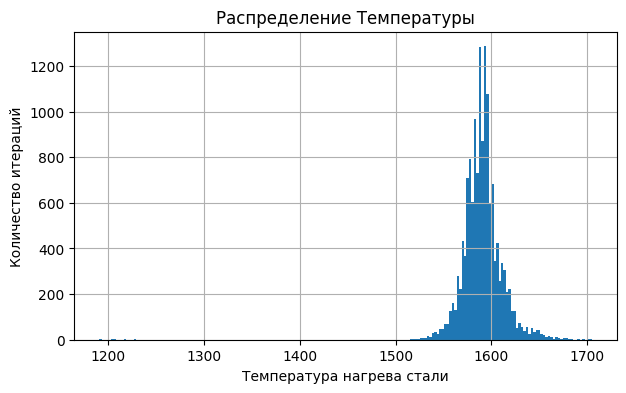

In [45]:
data_temp['Температура'].hist(bins=200, grid=True, figsize=(7, 4))
plt.title('Распределение Температуры')
plt.xlabel('Температура нагрева стали')
plt.ylabel('Количество итераций');

In [46]:
# так как температура плавления стали 1450-1550 градусов по Цельсию, значения ниже 1450 - ошибка
# партии, в которых встречаются такие записи необходимо удалить
# посмотрим сколько таких записей
data_temp_list = data_temp['Температура'].tolist()
data_temp_low_count = sum(1 for x in data_temp_list if x < 1450)
data_temp_low_count

5

In [47]:
# 5 строк со значениями Температуры ниже температуры плавления стали, посмотрим в каких партиях присутствуют такие значения
data_temp_low_key = data_temp.loc[data_temp["Температура"] < 1450]
data_temp_low_key

key         Время замера  Температура
4883    867  2019-06-06 08:03:39       1191.0
6784   1214  2019-06-18 08:01:03       1208.0
9050   1619  2019-07-03 02:34:41       1218.0
11495  2052  2019-07-25 08:49:15       1227.0
14283  2561  2019-08-12 18:49:29       1204.0

In [48]:
data_temp_867 = data_temp[data_temp['key'] == 867]
data_temp_867.count().sum()

24

In [49]:
data_temp_1214 = data_temp[data_temp['key'] == 1214]
data_temp_1214.count().sum()

12

In [50]:
data_temp_1619 = data_temp[data_temp['key'] == 1619]
data_temp_1619.count().sum()

9

In [51]:
data_temp_2052 = data_temp[data_temp['key'] == 2052]
data_temp_2052.count().sum()

18

In [52]:
data_temp_2561 = data_temp[data_temp['key'] == 2561]
data_temp_2561.count().sum()

13

In [53]:
print('Процент записей с температурой ниже плавления стали:', round(((24 + 12 + 9 + 18 + 13) / 18092) * 100, 2), '%')

Процент записей с температурой ниже плавления стали: 0.42 %


In [54]:
# посмотрим в каких партиях присутствуют пропущенные значения
data_temp_isn_key = data_temp.loc[data_temp["Температура"].isna()]
data_temp_isn_key

key         Время замера  Температура
13927  2500  2019-08-10 14:13:11          NaN
13928  2500  2019-08-10 14:18:12          NaN
13929  2500  2019-08-10 14:25:53          NaN
13930  2500  2019-08-10 14:29:39          NaN
13932  2501  2019-08-10 14:49:15          NaN
...     ...                  ...          ...
18087  3241  2019-09-06 16:55:01          NaN
18088  3241  2019-09-06 17:06:38          NaN
18089  3241  2019-09-06 17:21:48          NaN
18090  3241  2019-09-06 17:24:44          NaN
18091  3241  2019-09-06 17:30:05          NaN

[3427 rows x 3 columns]

In [55]:
data_temp_isn_key['key'].value_counts()

2567    14
2916    12
2917    11
2926    11
2631    10
        ..
3112     1
2841     1
3059     1
2738     1
2582     1
Name: key, Length: 739, dtype: int64

In [56]:
# сколько всего партий, в которых встречаются пропущенные значений измерений температур
data_temp_isn_key['key'].value_counts().count()

739

In [57]:
print('Процент записей с пропущенными значениями температуры:', 
      round((data_temp_isn_key['key'].value_counts().count() / 3241) * 100, 2), '%')

Процент записей с пропущенными значениями температуры: 22.8 %


In [58]:
data_temp_key_1 = data_temp['key'].value_counts()
data_temp_key_1

2108    17
1513    16
1689    16
2567    15
46      14
        ..
247      2
1169     2
246      2
195      1
279      1
Name: key, Length: 3216, dtype: int64

In [59]:
#data_temp_key_1.count()

In [60]:
# по сколько записей встречается в партиях/ключах key
data_temp_key_1.unique()

array([17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [61]:
all_keys = data_temp['key'].unique()
all_keys

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

In [62]:
#data_temp_k = data_temp[data_temp['key'] == 2568]
#print(data_temp_k.count())

In [63]:
print('Номера партий с одним значением температуры:')
for k in all_keys:
   # print('key', k)
    data_temp_k = data_temp[data_temp['key'] == k]
   # print(data_temp_k.count().unique()[0])
    if data_temp_k.count().unique()[0] == 1:
        print(k)

Номера партий с одним значением температуры:
195
279


**Выводы:**

- в датасете с результатами измерения **Температуры** 18092 записей
- кол-во партий, присутствующих в данных о температуре - 3216, нумерация - с 1 по 3241
- дубликатов нет
- 3427 пропусков есть в значениях Температура. Партии, в которых есть пропущенные значения, нужно удалить. Таких 739 партий. Пропуски составляют 22,8% от всех записей, но так как восстановить их невозможно - они  появились из-за сбоя датчика, и их восстановление будет более некорректным, нежели удаление, после их удаления для анализа останетс около 80% данных, этого достаточно
- распределение значений Температуры нормальное
- так как минимальная температура плавления стали 1450 градусов по Цельсию, значения ниже 1450 - ошибочны, нужно удалить все партии, в которых эти значения встречаются, это партии/кол-во записей в партии: 867/24, 1214/12, 1619/9, 2052/18, 2561/13
- всего записей с ошибочной температурой (ниже температуры плавления стали) 76, это составляет 0,42% от общего кол-ва записей, удаляем все партии с такими измерениями
- по каждой партии встречается кол-во записей температур от 1 до 17
- по некоторым ключам есть только один замер, это тоже аномалия, недопустимо, так как при построении моделей получится, что таргет (конечная температура) и признак (начальная температура) будут одним и тем же значением, такие партии тоже удаляем. Это партии 195 и 279

**Что сделать:**

- партии, в которых есть пропущенные значения - удалить
- партии, в которых температура ниже 1450 - удалить
- партии, в которых есть только один замер - удалить

### Данные о проволочных материалах (объём)

In [87]:
try:
    data_wire = pd.read_csv('/datasets/data_wire_new.csv')
except:
    data_wire = pd.read_csv('data_wire_new.csv') 

In [88]:
display(data_wire.head())
data_wire.info()
data_wire.describe()

key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442841  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           Wire 6     Wire 7      Wire 8     Wire 9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std     33.919845   8.610584   16.881728  19.931616  
min      0.034320   0.234208   45.076721   4.622800  
25%     25.053600   6.762756   46.094879  22.058401  
50%     42.076324   9.017009   46.279999  30.066399  
75%     64.212723  11.886057   48.089603  43.862003  
max    180.454575  32.847674  102.762401  90.053604

In [89]:
data_wire['key'].value_counts().count()

3081

In [90]:
data_wire.duplicated().sum()

0

In [91]:
data_wire.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

**Выводы:**

- всего использовалось 9 видов проволоки
- кол-во партий в датасете **О проволочных материалах (объем)** 3081, на 48 меньше, чем в электродах и материалах
- пропуски - аналогично сыпучим материалам - заменяем нулями (значит не использовался в конкретной партии именно этот проволочный материал)
- если какая-либо проволока Wire использовалась менее чем в 30 партиях, удаляем эти строки, значит не важен, редко используемый проволочный материал (это менее 1% всех партий)

**Что сделать:**

- пропуски заменяем на нули
- если значения по столбцу Wire менее чем в 30 строках - удаляем эти виды проволоки (столбцы) совсем

 ### Данные о проволочных материалах (время)

In [92]:
try:
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    data_wire_time = pd.read_csv('data_wire_time_new.csv') 

In [93]:
display(data_wire_time.head())
data_wire_time.info()
data_wire_time.describe()

key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000

In [71]:
data_wire_time.duplicated().sum()

0

In [72]:
data_wire_time.isna().sum()

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

**Вывод:**

- кол-во ключей/партий 3081 при нумерации всех партий от 1 до 3241
- дубликатов нет
- очень много пропусков, делаем вывод, что это файл не информативен для анализа

**Что сделать:**

Не берем датасет **Данные о проволочных материалах (время)** для дальнейшего анализа

## Общие выводы по 1 этапу, дальнейший план:

- партии, используемые в каждом датасете от 1 до 3241, но кол-во разное:
  - в электродах 3214
  - в материалах 3129
  - о продувке сплава газом 3239
  - о проволоке 3081
  - о температуре 3216
- пропуски удаляем/заменяем по каждому датасету (см. промежуточные выводы)
- объединяем датасеты об электродах, о подаче сыпучих материалах и проволоки, о продувке газом, об измерении температуры - по ключу партии key
- как признаки берем: 
  - только первую температуру
  - объем подачи сыпучих материалов
  - объем подачи проволоки
  - данные о продувке сплава газом
  - признаки Активная мощность и Реактивная мощность: можно использовать одну из них как признак, можно обе, можно по теореме Пифагора – корень из суммы их квадратов. Но важнее и правильнее использовать признак Энергия (Активная мощность, умноженная на время)
- таргет - температура последнего замера (ее же и прогнозируем)
- разделяем выборку на трейн и тест 0,75/0,25
- для моделирования будем использовать модели регрессии:
  - линейную регрессию LinearRegression
  - дерево решений DecisionTreeRegressor
  - случайный лес RandomForestRegressor
  - градиентный бустинг CatBoostRegressor или LGBMRegressor
- лучшую модель протестируем на тестовой выборке
- сравним лучшую модель с константной моделью
- для оценки качества модели возьмем метрику MAE, стремимся к получению её значения меньше 6,8
- используем random_state=190623

## Предобработка данных

### Обработка данных о температуре

In [73]:
print(data_temp_isn_key.info())
data_temp_isn_key

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 13927 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           3427 non-null   int64  
 1   Время замера  3427 non-null   object 
 2   Температура   0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 107.1+ KB
None


key         Время замера  Температура
13927  2500  2019-08-10 14:13:11          NaN
13928  2500  2019-08-10 14:18:12          NaN
13929  2500  2019-08-10 14:25:53          NaN
13930  2500  2019-08-10 14:29:39          NaN
13932  2501  2019-08-10 14:49:15          NaN
...     ...                  ...          ...
18087  3241  2019-09-06 16:55:01          NaN
18088  3241  2019-09-06 17:06:38          NaN
18089  3241  2019-09-06 17:21:48          NaN
18090  3241  2019-09-06 17:24:44          NaN
18091  3241  2019-09-06 17:30:05          NaN

[3427 rows x 3 columns]

In [74]:
print(data_temp.shape)
data_temp.info()

(18092, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [75]:
# удаляем партии с пропущенными значениями температуры
data_temp = data_temp[~data_temp['key'].isin(data_temp_isn_key['key'].unique())]
print(data_temp.isna().sum())
data_temp.info()

key             0
Время замера    0
Температура     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13926 non-null  int64  
 1   Время замера  13926 non-null  object 
 2   Температура   13926 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 435.2+ KB


In [76]:
# удаляем партии, в которых значение температуры ниже температуры плавления стали (1450)
data_temp = data_temp[~data_temp['key'].isin(data_temp_low_key['key'].unique())]
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13905 non-null  int64  
 1   Время замера  13905 non-null  object 
 2   Температура   13905 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 434.5+ KB


In [77]:
# удаляем партии, в которых встречается только по одному замеру температуры
data_temp = data_temp.query('key != 195 and key != 279')
print(data_temp.info())
data_temp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13903 non-null  int64  
 1   Время замера  13903 non-null  object 
 2   Температура   13903 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 434.5+ KB
None


key         Время замера  Температура
0         1  2019-05-03 11:02:04       1571.0
1         1  2019-05-03 11:07:18       1604.0
2         1  2019-05-03 11:11:34       1618.0
3         1  2019-05-03 11:18:04       1601.0
4         1  2019-05-03 11:25:59       1606.0
...     ...                  ...          ...
13921  2499  2019-08-10 13:33:21       1569.0
13922  2499  2019-08-10 13:41:34       1604.0
13923  2499  2019-08-10 13:46:28       1593.0
13924  2499  2019-08-10 13:54:56       1588.0
13925  2499  2019-08-10 13:58:58       1603.0

[13903 rows x 3 columns]

In [78]:
data_temp.columns = ['key', 'time', 'temp']

In [79]:
data_temp = data_temp.groupby(by = 'key').agg(['first', 'last']) 
data_temp.columns = ['time_first', 'time_last', 'temp_first', 'temp_last']
data_temp

time_first            time_last  temp_first  temp_last
key                                                                  
1     2019-05-03 11:02:04  2019-05-03 11:30:38      1571.0     1613.0
2     2019-05-03 11:34:04  2019-05-03 11:55:09      1581.0     1602.0
3     2019-05-03 12:06:44  2019-05-03 12:35:57      1596.0     1599.0
4     2019-05-03 12:39:27  2019-05-03 12:59:47      1601.0     1625.0
5     2019-05-03 13:11:03  2019-05-03 13:36:39      1576.0     1602.0
...                   ...                  ...         ...        ...
2495  2019-08-10 11:27:47  2019-08-10 11:50:47      1570.0     1591.0
2496  2019-08-10 11:56:48  2019-08-10 12:25:13      1554.0     1591.0
2497  2019-08-10 12:37:26  2019-08-10 12:53:28      1571.0     1589.0
2498  2019-08-10 12:58:11  2019-08-10 13:23:31      1591.0     1594.0
2499  2019-08-10 13:33:21  2019-08-10 13:58:58      1569.0     1603.0

[2471 rows x 4 columns]

In [80]:
print(data_temp.shape)
data_temp.info()
#data_temp.describe()

(2471, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_first  2471 non-null   object 
 1   time_last   2471 non-null   object 
 2   temp_first  2471 non-null   float64
 3   temp_last   2471 non-null   float64
dtypes: float64(2), object(2)
memory usage: 96.5+ KB


In [81]:
data_temp

time_first            time_last  temp_first  temp_last
key                                                                  
1     2019-05-03 11:02:04  2019-05-03 11:30:38      1571.0     1613.0
2     2019-05-03 11:34:04  2019-05-03 11:55:09      1581.0     1602.0
3     2019-05-03 12:06:44  2019-05-03 12:35:57      1596.0     1599.0
4     2019-05-03 12:39:27  2019-05-03 12:59:47      1601.0     1625.0
5     2019-05-03 13:11:03  2019-05-03 13:36:39      1576.0     1602.0
...                   ...                  ...         ...        ...
2495  2019-08-10 11:27:47  2019-08-10 11:50:47      1570.0     1591.0
2496  2019-08-10 11:56:48  2019-08-10 12:25:13      1554.0     1591.0
2497  2019-08-10 12:37:26  2019-08-10 12:53:28      1571.0     1589.0
2498  2019-08-10 12:58:11  2019-08-10 13:23:31      1591.0     1594.0
2499  2019-08-10 13:33:21  2019-08-10 13:58:58      1569.0     1603.0

[2471 rows x 4 columns]

In [82]:
#data_temp.reset_index(inplace= True)
#data_temp

### Обработка данных об электродах

In [83]:
# удалим выброс Реактивной мощности электродов, выяснили ранее, что это в партии 2116, удаляем её
data_arc = data_arc.query('key != 2116')
print(data_arc.info())
data_arc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14872 non-null  int64  
 1   Начало нагрева дугой  14872 non-null  object 
 2   Конец нагрева дугой   14872 non-null  object 
 3   Активная мощность     14872 non-null  float64
 4   Реактивная мощность   14872 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 697.1+ KB
None


key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0         1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1         1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2         1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3         1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4         1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   
...     ...                  ...                  ...                ...   
14871  3241  2019-09-06 16:49:05  2019-09-06 16:51:42           0.439735   
14872  3241  2019-09-06 16:55:11  2019-09-06 16:58:11           0.646498   
14873  3241  2019-09-06 17:06:48  2019-09-06 17:09:52           1.039726   
14874  3241  2019-09-06 17:21:58  2019-09-06 17:22:55           0.530267   
14875  3241  2019-09-06 17:24:54  2019-09-06 17:26:15           0.389057   

       Реактивная мощность  
0                 0.211253  
1                 0.477438  
2                 0.430460  
3                 0.379979  
4                 0.643691  
...                    ...  
14871             0.299579  
14872             0.458240  
14873             0.769302  
14874             0.361543  
14875             0.251347  

[14872 rows x 5 columns]

In [84]:
# приведем названия колонок к общему стилю
data_arc.columns = ['key', 'start_time', 'end_time', 'active_power', 'reactive_power']

In [85]:
# переведем тип данных начала и конца нагрева дугой в datetime
data_arc[['start_time', 'end_time']] = data_arc[['start_time', 'end_time']].astype('datetime64[ns]')

In [94]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14872 non-null  int64         
 1   start_time      14872 non-null  datetime64[ns]
 2   end_time        14872 non-null  datetime64[ns]
 3   active_power    14872 non-null  float64       
 4   reactive_power  14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


In [95]:
# добавим новый столбец - время нагрева дугой, выраженное в минутах
data_arc['time_power'] = (data_arc['end_time'] - data_arc['start_time']).dt.seconds/60
print(data_arc.shape)
data_arc

(14872, 6)


key          start_time            end_time  active_power  \
0         1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130   
1         1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658   
2         1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313   
3         1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496   
4         1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133   
...     ...                 ...                 ...           ...   
14871  3241 2019-09-06 16:49:05 2019-09-06 16:51:42      0.439735   
14872  3241 2019-09-06 16:55:11 2019-09-06 16:58:11      0.646498   
14873  3241 2019-09-06 17:06:48 2019-09-06 17:09:52      1.039726   
14874  3241 2019-09-06 17:21:58 2019-09-06 17:22:55      0.530267   
14875  3241 2019-09-06 17:24:54 2019-09-06 17:26:15      0.389057   

       reactive_power  time_power  
0            0.211253    3.800000  
1            0.477438    3.083333  
2            0.430460    2.866667  
3            0.379979    6.083333  
4            0.643691    2.466667  
...               ...         ...  
14871        0.299579    2.616667  
14872        0.458240    3.000000  
14873        0.769302    3.066667  
14874        0.361543    0.950000  
14875        0.251347    1.350000  

[14872 rows x 6 columns]

### Обработка данных о подаче сыпучих материалов (объём)

In [96]:
print(data_bulk.shape)
data_bulk.info()

(3129, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [97]:
# убираем материалы, которые встречаются менее чем в 1% случаев
data_bulk = data_bulk.drop(['Bulk 2', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 13'], axis=1)
data_bulk.info()
data_bulk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 3   1298 non-null   float64
 3   Bulk 4   1014 non-null   float64
 4   Bulk 5   77 non-null     float64
 5   Bulk 6   576 non-null    float64
 6   Bulk 10  176 non-null    float64
 7   Bulk 11  177 non-null    float64
 8   Bulk 12  2450 non-null   float64
 9   Bulk 14  2806 non-null   float64
 10  Bulk 15  2248 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 269.0 KB


key  Bulk 1  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  \
0        1     NaN     NaN    43.0     NaN     NaN      NaN      NaN    206.0   
1        2     NaN     NaN    73.0     NaN     NaN      NaN      NaN    206.0   
2        3     NaN     NaN    34.0     NaN     NaN      NaN      NaN    205.0   
3        4     NaN     NaN    81.0     NaN     NaN      NaN      NaN    207.0   
4        5     NaN     NaN    78.0     NaN     NaN      NaN      NaN    203.0   
...    ...     ...     ...     ...     ...     ...      ...      ...      ...   
3124  3237     NaN   170.0     NaN     NaN     NaN      NaN      NaN    252.0   
3125  3238     NaN   126.0     NaN     NaN     NaN      NaN      NaN    254.0   
3126  3239     NaN     NaN     NaN     NaN   114.0      NaN      NaN    158.0   
3127  3240     NaN     NaN     NaN     NaN    26.0      NaN      NaN      NaN   
3128  3241     NaN     NaN     NaN     NaN     NaN      NaN      NaN      NaN   

      Bulk 14  Bulk 15  
0       150.0    154.0  
1       149.0    154.0  
2       152.0    153.0  
3       153.0    154.0  
4       151.0    152.0  
...       ...      ...  
3124    130.0    206.0  
3125    108.0    106.0  
3126    270.0     88.0  
3127    192.0     54.0  
3128    180.0     52.0  

[3129 rows x 11 columns]

In [98]:
# в оставшихся материалах пропущенные значения заменяем на нули
data_bulk.fillna(0, inplace=True)
data_bulk.head()

key  Bulk 1  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  \
0    1     0.0     0.0    43.0     0.0     0.0      0.0      0.0    206.0   
1    2     0.0     0.0    73.0     0.0     0.0      0.0      0.0    206.0   
2    3     0.0     0.0    34.0     0.0     0.0      0.0      0.0    205.0   
3    4     0.0     0.0    81.0     0.0     0.0      0.0      0.0    207.0   
4    5     0.0     0.0    78.0     0.0     0.0      0.0      0.0    203.0   

   Bulk 14  Bulk 15  
0    150.0    154.0  
1    149.0    154.0  
2    152.0    153.0  
3    153.0    154.0  
4    151.0    152.0

In [99]:
print(data_bulk.shape)
data_bulk.info()

(3129, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   3129 non-null   float64
 2   Bulk 3   3129 non-null   float64
 3   Bulk 4   3129 non-null   float64
 4   Bulk 5   3129 non-null   float64
 5   Bulk 6   3129 non-null   float64
 6   Bulk 10  3129 non-null   float64
 7   Bulk 11  3129 non-null   float64
 8   Bulk 12  3129 non-null   float64
 9   Bulk 14  3129 non-null   float64
 10  Bulk 15  3129 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 269.0 KB


### Обработка данных о проволоке (объём)

In [100]:
print(data_wire.shape)
data_wire.info()

(3081, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [101]:
# убираем проволочные материалы, которые встечаются менее чем в 1% случаев (менее 30)
data_wire = data_wire.drop(['Wire 4', 'Wire 5', 'Wire 7', 'Wire 8', 'Wire 9'], axis=1)
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 6  73 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 120.5 KB


In [102]:
# в оставшихся проволочных материалах пропущенные значения заменяем на нули
data_wire.fillna(0, inplace=True)
print(data_wire.shape)
data_wire.info()
data_wire.head()

(3081, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
 3   Wire 3  3081 non-null   float64
 4   Wire 6  3081 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 120.5 KB


key     Wire 1   Wire 2  Wire 3  Wire 6
0    1  60.059998  0.00000     0.0     0.0
1    2  96.052315  0.00000     0.0     0.0
2    3  91.160157  0.00000     0.0     0.0
3    4  89.063515  0.00000     0.0     0.0
4    5  89.238236  9.11456     0.0     0.0

### Генерация новых признаков, агрегирование по ключу

#### Данные по электродам

- Создаём новый признак - Энергия (мощность, умноженная на время). 

Для этого найдем Полную мощность, по формуле - корень из суммы квадратов обеих мощностей (Активной и Реактивной):

$ 
S = \sqrt{P^2 + Q^2}
$

**S** - полная мощность

**P** - активная мощность

**Q** - реактивная мощность

- Время нашли как разницу между началом и концом нагрева дугой
- Для этого значения времени из типа object ранее перевели в  в datetime

In [103]:
s = ((data_arc['active_power'] ** 2) + (data_arc['reactive_power'] **2)) ** 0.5
s.head()

0    0.371123
1    0.902319
2    0.722536
3    0.642824
4    1.079934
dtype: float64

In [104]:
# находим потребление/расход энергии, в киловатт в час (кВт/час), используя найденную полную мощность
# разделим на 60 (у нас было в минутах) и умножим на 1000, так как мощность дана в Мегаваттах
data_arc['energy'] = ((data_arc['time_power'] / 60) * s) * 1000
data_arc

key          start_time            end_time  active_power  \
0         1 2019-05-03 11:02:14 2019-05-03 11:06:02      0.305130   
1         1 2019-05-03 11:07:28 2019-05-03 11:10:33      0.765658   
2         1 2019-05-03 11:11:44 2019-05-03 11:14:36      0.580313   
3         1 2019-05-03 11:18:14 2019-05-03 11:24:19      0.518496   
4         1 2019-05-03 11:26:09 2019-05-03 11:28:37      0.867133   
...     ...                 ...                 ...           ...   
14871  3241 2019-09-06 16:49:05 2019-09-06 16:51:42      0.439735   
14872  3241 2019-09-06 16:55:11 2019-09-06 16:58:11      0.646498   
14873  3241 2019-09-06 17:06:48 2019-09-06 17:09:52      1.039726   
14874  3241 2019-09-06 17:21:58 2019-09-06 17:22:55      0.530267   
14875  3241 2019-09-06 17:24:54 2019-09-06 17:26:15      0.389057   

       reactive_power  time_power     energy  
0            0.211253    3.800000  23.504445  
1            0.477438    3.083333  46.369161  
2            0.430460    2.866667  34.521188  
3            0.379979    6.083333  65.175168  
4            0.643691    2.466667  44.397292  
...               ...         ...        ...  
14871        0.299579    2.616667  23.204818  
14872        0.458240    3.000000  39.621445  
14873        0.769302    3.066667  66.106561  
14874        0.361543    0.950000  10.161700  
14875        0.251347    1.350000  10.421670  

[14872 rows x 7 columns]

In [105]:
#data_arc_target = data_arc['energy']

In [106]:
# для анализа как признаки нам интересны найденные величины - Энергия energy и Время нагрева дугой time_power
data_arc_fin = data_arc[['key', 'time_power', 'energy']]
data_arc_fin

key  time_power     energy
0         1    3.800000  23.504445
1         1    3.083333  46.369161
2         1    2.866667  34.521188
3         1    6.083333  65.175168
4         1    2.466667  44.397292
...     ...         ...        ...
14871  3241    2.616667  23.204818
14872  3241    3.000000  39.621445
14873  3241    3.066667  66.106561
14874  3241    0.950000  10.161700
14875  3241    1.350000  10.421670

[14872 rows x 3 columns]

In [107]:
# сгруппируем эти признаки по ключу key
data_arc_fin = data_arc_fin.groupby('key').agg(sum)
print(data_arc_fin.shape)
data_arc_fin.head()

(3213, 2)


time_power      energy
key                        
1     18.300000  213.967254
2     13.516667  133.822224
3     10.916667  200.788241
4     12.350000  189.848777
5     14.483333  142.269426

#### Данные о сыпучих материалах и проволоке

- каждый ключ/партия соотносится с одним материалом, группируем по ключу

In [108]:
data_bulk = data_bulk.groupby('key').agg(sum)
data_bulk.head()

Bulk 1  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  \
key                                                                      
1       0.0     0.0    43.0     0.0     0.0      0.0      0.0    206.0   
2       0.0     0.0    73.0     0.0     0.0      0.0      0.0    206.0   
3       0.0     0.0    34.0     0.0     0.0      0.0      0.0    205.0   
4       0.0     0.0    81.0     0.0     0.0      0.0      0.0    207.0   
5       0.0     0.0    78.0     0.0     0.0      0.0      0.0    203.0   

     Bulk 14  Bulk 15  
key                    
1      150.0    154.0  
2      149.0    154.0  
3      152.0    153.0  
4      153.0    154.0  
5      151.0    152.0

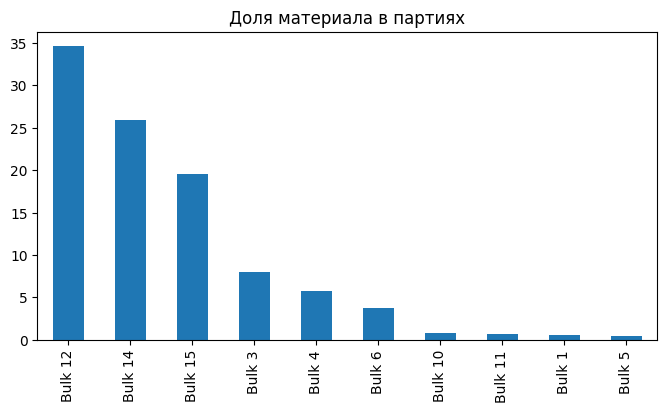

In [109]:
# статистика расхода каждого сыпучего материала
data_bulk_sort = (data_bulk.sum()/data_bulk.sum().sum()*100).sort_values(ascending=False)
data_bulk_sort.plot(kind='bar', title='Доля материала в партиях', figsize=(8,4));

In [110]:
data_wire = data_wire.groupby('key').agg(sum)
data_wire

Wire 1   Wire 2  Wire 3  Wire 6
key                                      
1      60.059998  0.00000     0.0     0.0
2      96.052315  0.00000     0.0     0.0
3      91.160157  0.00000     0.0     0.0
4      89.063515  0.00000     0.0     0.0
5      89.238236  9.11456     0.0     0.0
...          ...      ...     ...     ...
3237   38.088959  0.00000     0.0     0.0
3238   56.128799  0.00000     0.0     0.0
3239  143.357761  0.00000     0.0     0.0
3240   34.070400  0.00000     0.0     0.0
3241   63.117595  0.00000     0.0     0.0

[3081 rows x 4 columns]

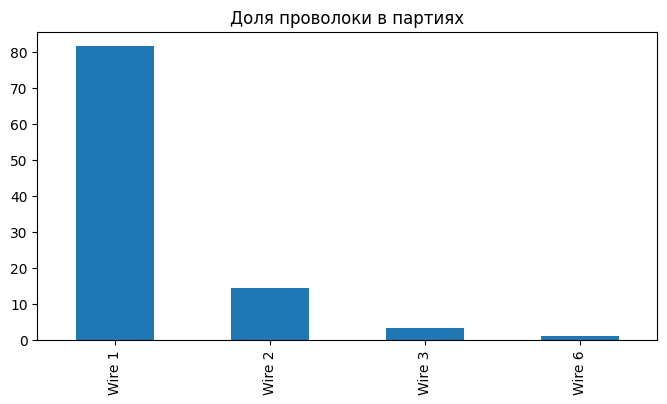

In [111]:
# статистика расхода каждого вида проволоки
data_wire_sort = (data_wire.sum()/data_wire.sum().sum()*100).sort_values(ascending=False)
data_wire_sort.plot(kind='bar', title='Доля проволоки в партиях', figsize=(8,4));

#### Данные о температуре

- агрегация проведена на этапе предобработки, оставили значения температур первого и последнего замера

In [112]:
# переведем тип данных первого и последнего замера температуры в datetime
data_temp[['time_first', 'time_last']] = data_temp[['time_first', 'time_last']].astype('datetime64[ns]')

In [113]:
# найдем разницу между точками замера - начальным и конечным временем
data_temp['time_temp'] = (data_temp['time_last'] - data_temp['time_first']).dt.seconds
data_temp

time_first           time_last  temp_first  temp_last  time_temp
key                                                                           
1    2019-05-03 11:02:04 2019-05-03 11:30:38      1571.0     1613.0       1714
2    2019-05-03 11:34:04 2019-05-03 11:55:09      1581.0     1602.0       1265
3    2019-05-03 12:06:44 2019-05-03 12:35:57      1596.0     1599.0       1753
4    2019-05-03 12:39:27 2019-05-03 12:59:47      1601.0     1625.0       1220
5    2019-05-03 13:11:03 2019-05-03 13:36:39      1576.0     1602.0       1536
...                  ...                 ...         ...        ...        ...
2495 2019-08-10 11:27:47 2019-08-10 11:50:47      1570.0     1591.0       1380
2496 2019-08-10 11:56:48 2019-08-10 12:25:13      1554.0     1591.0       1705
2497 2019-08-10 12:37:26 2019-08-10 12:53:28      1571.0     1589.0        962
2498 2019-08-10 12:58:11 2019-08-10 13:23:31      1591.0     1594.0       1520
2499 2019-08-10 13:33:21 2019-08-10 13:58:58      1569.0     1603.0       1537

[2471 rows x 5 columns]

In [114]:
# оставим в датафрейме о температуре найденные значение первой и конечной температуры нагрева
# уберем первое и последнее значение времени
data_temp = data_temp.drop(['time_first', 'time_last'], axis=1)
print(data_temp.shape)
data_temp

(2471, 3)


temp_first  temp_last  time_temp
key                                   
1         1571.0     1613.0       1714
2         1581.0     1602.0       1265
3         1596.0     1599.0       1753
4         1601.0     1625.0       1220
5         1576.0     1602.0       1536
...          ...        ...        ...
2495      1570.0     1591.0       1380
2496      1554.0     1591.0       1705
2497      1571.0     1589.0        962
2498      1591.0     1594.0       1520
2499      1569.0     1603.0       1537

[2471 rows x 3 columns]

#### Данные о продувке сплава газом

- на каждую партию/ключ приходится свой объём газа, группируем по ключу

In [115]:
data_gas = data_gas.groupby('key').agg(sum)
data_gas

gas
key            
1     29.749986
2     12.555561
3     28.554793
4     18.841219
5      5.413692
...         ...
3237   5.543905
3238   6.745669
3239  16.023518
3240  11.863103
3241  12.680959

[3239 rows x 1 columns]

### Создание и анализ объединенного датафрейма

In [116]:
# объединять все датафреймы будем по ключу key, присоединяя все столбцы к основному датафрейму - данных о температуре
data = data_temp.merge(data_arc_fin, on='key', how='inner')\
                   .merge(data_bulk, on='key', how='inner')\
                   .merge(data_wire, on='key', how='inner')\
                   .merge(data_gas, on='key', how='inner')

In [117]:
print(data.shape)
data.head()

(2324, 20)


temp_first  temp_last  time_temp  time_power      energy  Bulk 1  Bulk 3  \
key                                                                             
1        1571.0     1613.0       1714   18.300000  213.967254     0.0     0.0   
2        1581.0     1602.0       1265   13.516667  133.822224     0.0     0.0   
3        1596.0     1599.0       1753   10.916667  200.788241     0.0     0.0   
4        1601.0     1625.0       1220   12.350000  189.848777     0.0     0.0   
5        1576.0     1602.0       1536   14.483333  142.269426     0.0     0.0   

     Bulk 4  Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  Bulk 14  Bulk 15  \
key                                                                        
1      43.0     0.0     0.0      0.0      0.0    206.0    150.0    154.0   
2      73.0     0.0     0.0      0.0      0.0    206.0    149.0    154.0   
3      34.0     0.0     0.0      0.0      0.0    205.0    152.0    153.0   
4      81.0     0.0     0.0      0.0      0.0    207.0    153.0    154.0   
5      78.0     0.0     0.0      0.0      0.0    203.0    151.0    152.0   

        Wire 1   Wire 2  Wire 3  Wire 6        gas  
key                                                 
1    60.059998  0.00000     0.0     0.0  29.749986  
2    96.052315  0.00000     0.0     0.0  12.555561  
3    91.160157  0.00000     0.0     0.0  28.554793  
4    89.063515  0.00000     0.0     0.0  18.841219  
5    89.238236  9.11456     0.0     0.0   5.413692

In [118]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 1 to 2499
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_first  2324 non-null   float64
 1   temp_last   2324 non-null   float64
 2   time_temp   2324 non-null   int64  
 3   time_power  2324 non-null   float64
 4   energy      2324 non-null   float64
 5   Bulk 1      2324 non-null   float64
 6   Bulk 3      2324 non-null   float64
 7   Bulk 4      2324 non-null   float64
 8   Bulk 5      2324 non-null   float64
 9   Bulk 6      2324 non-null   float64
 10  Bulk 10     2324 non-null   float64
 11  Bulk 11     2324 non-null   float64
 12  Bulk 12     2324 non-null   float64
 13  Bulk 14     2324 non-null   float64
 14  Bulk 15     2324 non-null   float64
 15  Wire 1      2324 non-null   float64
 16  Wire 2      2324 non-null   float64
 17  Wire 3      2324 non-null   float64
 18  Wire 6      2324 non-null   float64
 19  gas         2324 non-null  

temp_first    temp_last     time_temp   time_power       energy  \
count  2324.000000  2324.000000   2324.000000  2324.000000  2324.000000   
mean   1587.368761  1593.372633   2323.682014    13.469944   186.175666   
std      23.627590    11.207457   1385.809791     5.680230    88.757419   
min    1519.000000  1541.000000    339.000000     0.950000     9.286169   
25%    1571.000000  1587.000000   1580.500000     9.683333   127.201386   
50%    1587.000000  1593.000000   2046.500000    12.966667   175.341351   
75%    1603.000000  1598.000000   2793.500000    16.550000   233.840059   
max    1660.000000  1653.000000  23674.000000    69.816667  1262.890503   

            Bulk 1       Bulk 3       Bulk 4       Bulk 5       Bulk 6  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      3.435026    47.317126    37.347676     2.645869    22.419535   
std      12.424463    75.238050    58.677890    22.426054    55.792509   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000    80.000000    77.250000     0.000000     0.000000   
max     185.000000   454.000000   281.000000   603.000000   503.000000   

           Bulk 10      Bulk 11      Bulk 12      Bulk 14      Bulk 15  \
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000   
mean      5.063683     4.254303   208.597676   153.952668   120.078313   
std      20.938984    22.538843   157.112117    81.410544    84.655967   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   105.000000   105.000000     0.000000   
50%       0.000000     0.000000   206.000000   149.000000   107.000000   
75%       0.000000     0.000000   283.000000   204.000000   204.000000   
max     159.000000   313.000000  1849.000000   636.000000   405.000000   

            Wire 1       Wire 2       Wire 3       Wire 6          gas  
count  2324.000000  2324.000000  2324.000000  2324.000000  2324.000000  
mean    102.423900    17.613213     3.241876     0.980926    11.378854  
std      43.540975    33.648176    27.972523     8.702531     6.397008  
min       0.000000     0.000000     0.000000     0.000000     0.008399  
25%      73.204559     0.000000     0.000000     0.000000     7.282534  
50%     101.103600     0.000000     0.000000     0.000000    10.100687  
75%     128.075222    23.102560     0.000000     0.000000    14.218487  
max     330.314424   282.780152   385.008668   180.454575    77.995040

**В итоговую таблицу вошли:**

- всего 2324 строки, столько же ключей/партий
- время первого и последнего замера температуры заменили на одно значение - времени нагрева
- значения первого и последнего замера температуры будут использоваться как признак и целевой признак
- по электродам остается один признак - потреблённая энергия
- из материалов, подаваемых в сплав осталось 10 видов
- проволоки - 4 вида
- по газу - значения объемов на каждую партию

In [119]:
#data_graf = data.reset_index('key')
#data_graf 

In [120]:
#data_graf.hist(bins=50, figsize=(15, 7));

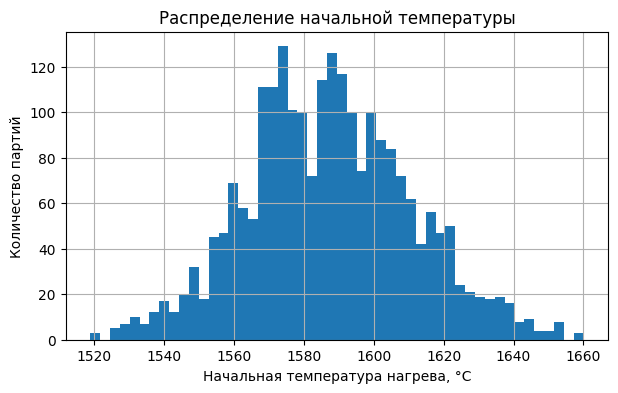

In [121]:
# распределение начальной температуры в объединенном датафрейме
data['temp_first'].hist(bins=50, figsize=(7,4))
plt.title('Распределение начальной температуры')
plt.xlabel('Начальная температура нагрева, °С')
plt.ylabel('Количество партий');

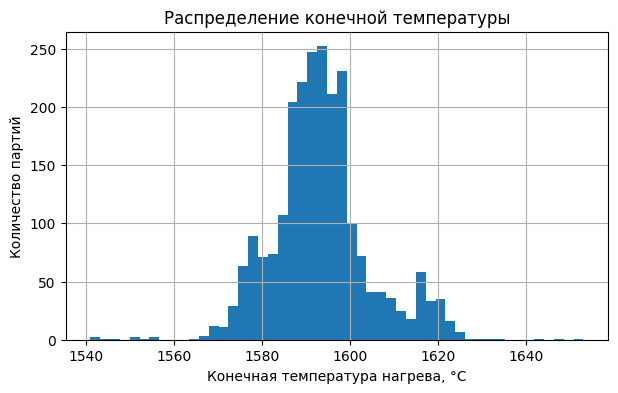

In [122]:
data['temp_last'].hist(bins=50, figsize=(7,4))
plt.title('Распределение конечной температуры')
plt.xlabel('Конечная температура нагрева, °С')
plt.ylabel('Количество партий');

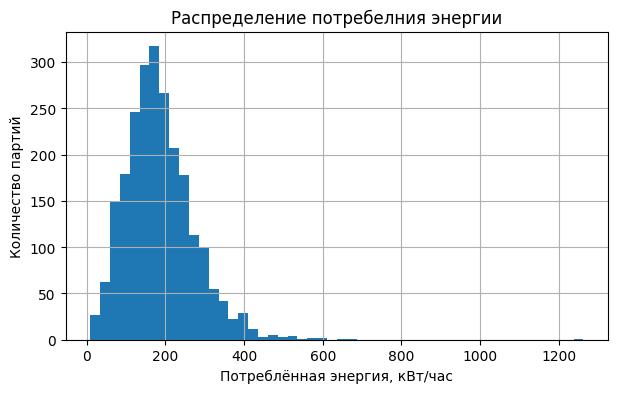

In [123]:
data['energy'].hist(bins=50, figsize=(7,4))
plt.title('Распределение потребелния энергии')
plt.xlabel('Потреблённая энергия, кВт/час')
plt.ylabel('Количество партий');

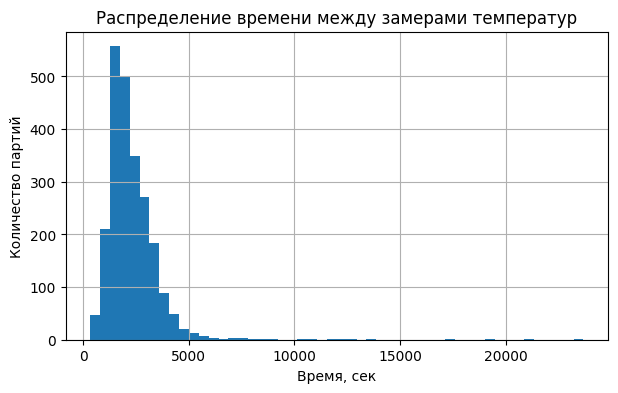

In [124]:
data['time_temp'].hist(bins=50, figsize=(7,4))
plt.title('Распределение времени между замерами температур')
plt.xlabel('Время, сек')
plt.ylabel('Количество партий');

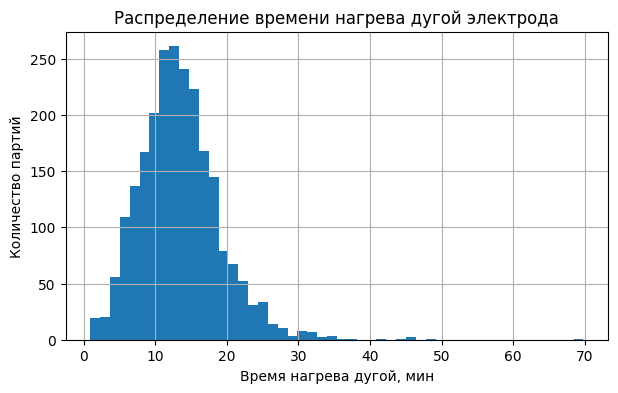

In [125]:
data['time_power'].hist(bins=50, figsize=(7,4))
plt.title('Распределение времени нагрева дугой электрода')
plt.xlabel('Время нагрева дугой, мин')
plt.ylabel('Количество партий');

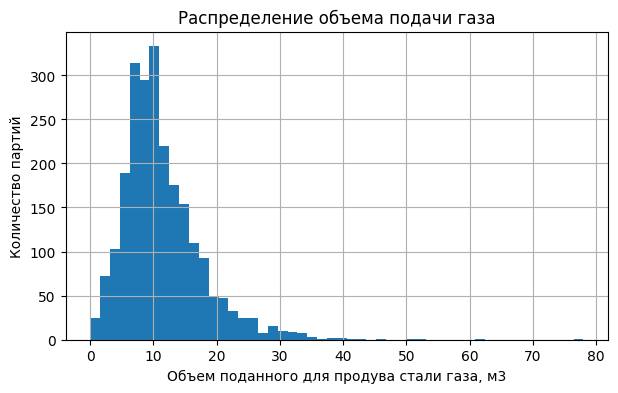

In [126]:
data['gas'].hist(bins=50, figsize=(7,4))
plt.title('Распределение объема подачи газа')
plt.xlabel('Объем поданного для продува стали газа, м3')
plt.ylabel('Количество партий');

In [127]:
# общая таблица корреляции признаков
data_corr = data.corr()
data_corr

temp_first  temp_last  time_temp  time_power    energy    Bulk 1  \
temp_first    1.000000   0.301882   0.210786   -0.383939 -0.345598  0.079098   
temp_last     0.301882   1.000000   0.096126    0.277953  0.255918 -0.075428   
time_temp     0.210786   0.096126   1.000000    0.562472  0.507242  0.144429   
time_power   -0.383939   0.277953   0.562472    1.000000  0.900403  0.102708   
energy       -0.345598   0.255918   0.507242    0.900403  1.000000  0.095353   
Bulk 1        0.079098  -0.075428   0.144429    0.102708  0.095353  1.000000   
Bulk 3       -0.113380  -0.037156   0.023019    0.091603  0.088817 -0.011538   
Bulk 4        0.165484   0.187817   0.002019   -0.029086 -0.021948  0.041662   
Bulk 5        0.078729  -0.028446   0.103657    0.013344  0.019330  0.060365   
Bulk 6       -0.127046  -0.180906   0.154967    0.162777  0.149356 -0.003581   
Bulk 10       0.035789   0.061227  -0.009052   -0.005427 -0.007705 -0.023333   
Bulk 11      -0.110430  -0.114936   0.038518    0.077959  0.068908 -0.038008   
Bulk 12      -0.079574   0.266805   0.209555    0.466002  0.420553  0.325724   
Bulk 14      -0.179991   0.114893   0.173886    0.461035  0.406102  0.207606   
Bulk 15      -0.062382   0.265772   0.099081    0.294538  0.272393 -0.001211   
Wire 1        0.262880   0.317488   0.154280    0.055443  0.060615  0.013823   
Wire 2       -0.101101  -0.207242   0.060407    0.054460  0.047316 -0.009261   
Wire 3       -0.003403  -0.047636   0.068401    0.033251  0.036228  0.020204   
Wire 6        0.020733  -0.084149   0.144125    0.042155  0.047073  0.148509   
gas           0.036736   0.059079   0.439041    0.396207  0.354231  0.234089   

              Bulk 3    Bulk 4    Bulk 5    Bulk 6   Bulk 10   Bulk 11  \
temp_first -0.113380  0.165484  0.078729 -0.127046  0.035789 -0.110430   
temp_last  -0.037156  0.187817 -0.028446 -0.180906  0.061227 -0.114936   
time_temp   0.023019  0.002019  0.103657  0.154967 -0.009052  0.038518   
time_power  0.091603 -0.029086  0.013344  0.162777 -0.005427  0.077959   
energy      0.088817 -0.021948  0.019330  0.149356 -0.007705  0.068908   
Bulk 1     -0.011538  0.041662  0.060365 -0.003581 -0.023333 -0.038008   
Bulk 3      1.000000 -0.295526 -0.006766  0.066316 -0.085266 -0.007383   
Bulk 4     -0.295526  1.000000  0.028273 -0.251577 -0.084975 -0.119733   
Bulk 5     -0.006766  0.028273  1.000000 -0.021853 -0.028544 -0.015888   
Bulk 6      0.066316 -0.251577 -0.021853  1.000000 -0.097218  0.196983   
Bulk 10    -0.085266 -0.084975 -0.028544 -0.097218  1.000000 -0.045666   
Bulk 11    -0.007383 -0.119733 -0.015888  0.196983 -0.045666  1.000000   
Bulk 12     0.018059  0.105190 -0.072951 -0.112169  0.027651 -0.040419   
Bulk 14     0.011209 -0.091103 -0.066101  0.176791 -0.045880  0.077966   
Bulk 15    -0.013181  0.100833 -0.067426 -0.108626  0.051953 -0.048571   
Wire 1      0.037788  0.298145 -0.013454 -0.235445  0.062892 -0.117798   
Wire 2      0.094897 -0.268115 -0.013811  0.205432 -0.103828  0.062074   
Wire 3      0.005840 -0.039326  0.070889 -0.046545 -0.028039 -0.021878   
Wire 6      0.007174 -0.011507  0.204796 -0.020223 -0.017860  0.008655   
gas         0.059665  0.017532  0.086869  0.139574 -0.008634  0.041945   

             Bulk 12   Bulk 14   Bulk 15    Wire 1    Wire 2    Wire 3  \
temp_first -0.079574 -0.179991 -0.062382  0.262880 -0.101101 -0.003403   
temp_last   0.266805  0.114893  0.265772  0.317488 -0.207242 -0.047636   
time_temp   0.209555  0.173886  0.099081  0.154280  0.060407  0.068401   
time_power  0.466002  0.461035  0.294538  0.055443  0.054460  0.033251   
energy      0.420553  0.406102  0.272393  0.060615  0.047316  0.036228   
Bulk 1      0.325724  0.207606 -0.001211  0.013823 -0.009261  0.020204   
Bulk 3      0.018059  0.011209 -0.013181  0.037788  0.094897  0.005840   
Bulk 4      0.105190 -0.091103  0.100833  0.298145 -0.268115 -0.039326   
Bulk 5     -0.072951 -0.066101 -0.067426 -0.013454 -0.013811  0.070889   
Bulk 6     -0.112169  0.176791 -0.10

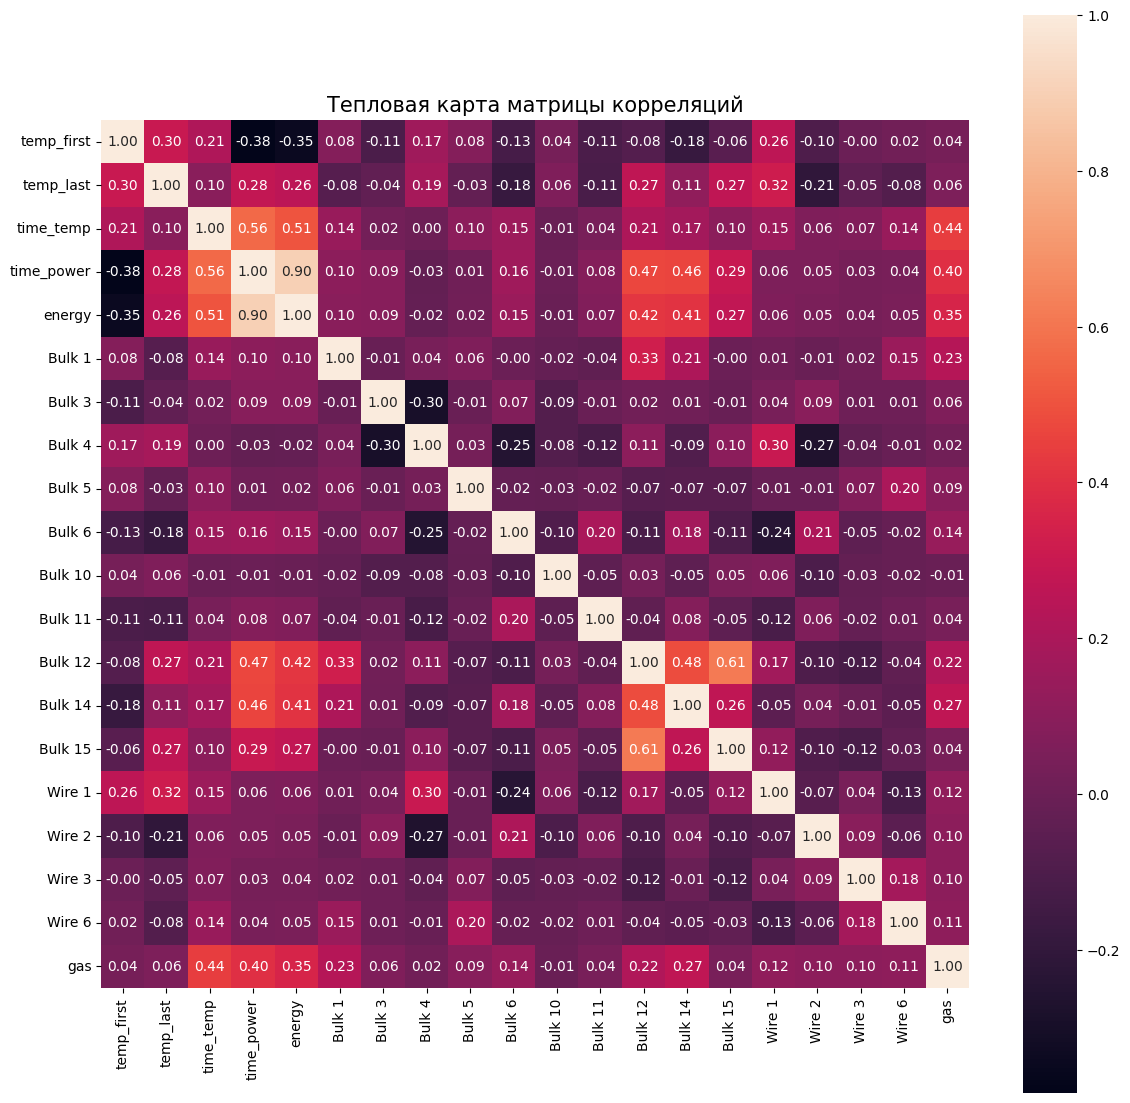

In [128]:
# построим тепловую карту корреляции
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(data_corr, annot=True, square=True, fmt='.2f')
heatmap.set_title('Тепловая карта матрицы корреляций', fontsize=15);

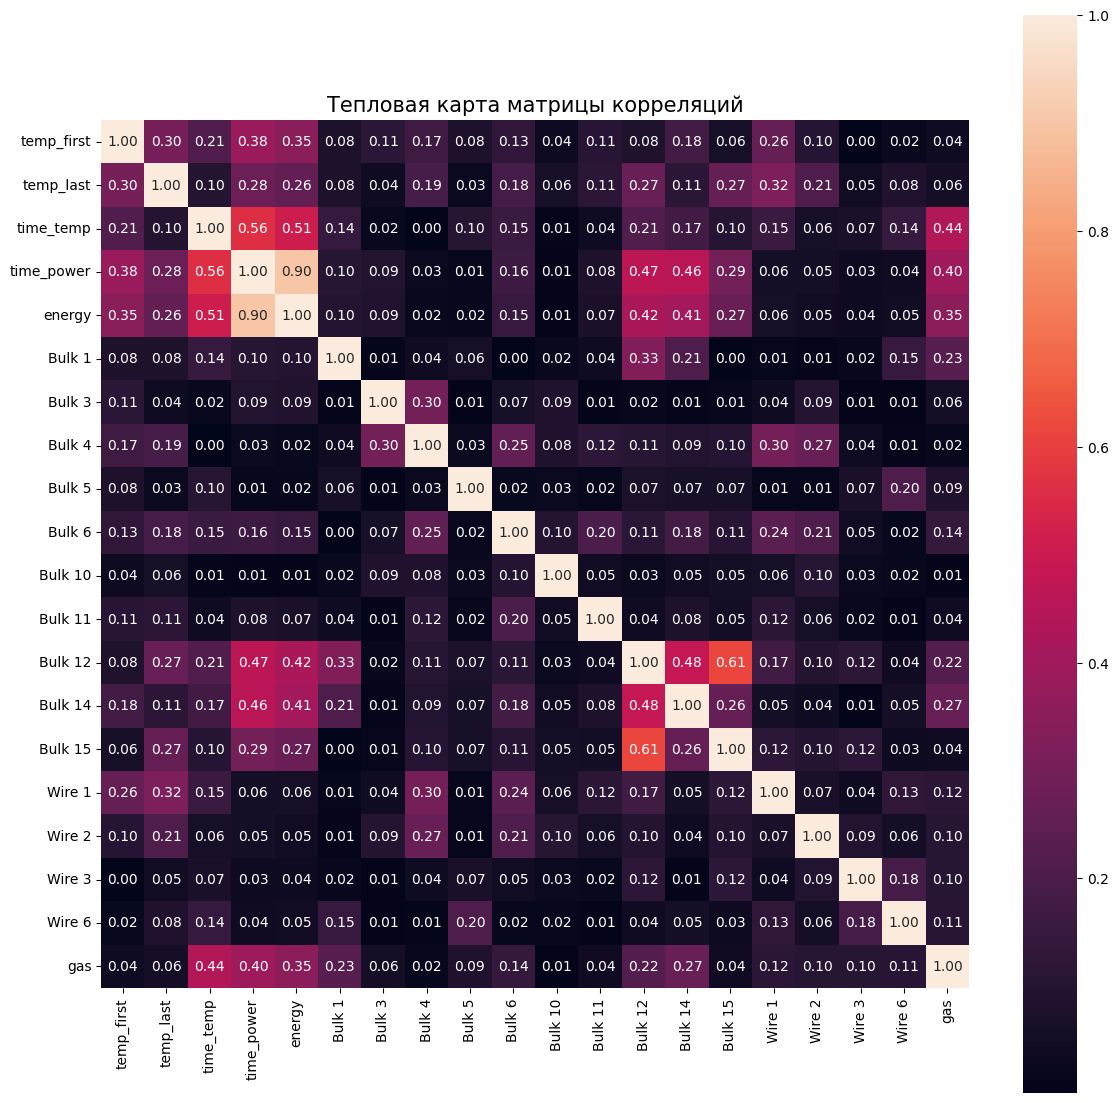

In [129]:
# построим тепловую карту корреляции
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(data_corr.abs(), annot=True, square=True, fmt='.2f')
heatmap.set_title('Тепловая карта матрицы корреляций', fontsize=15);

- Замечена более сильная зависимость между некоторыми сыпучими материалами bulk и проволочными материалами wire, и между собой (корреляция больше 0,2)
- Наиболее сильная зависимость - между начальной температурой нагрева стали электродом time_first и временем нагрева time_power, также (чуть меньше, но больше других) - между начальной температурой нагрева time_first и потребляемой энергией energy

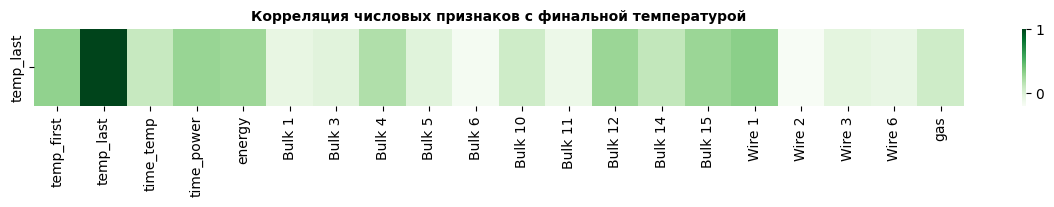

In [130]:
# зависимость признаков от целевой переменной
f, ax = plt.subplots(figsize=(15,1))
sns.heatmap(data_corr.sort_values(by=['temp_last'], ascending=False).head(1), cmap='Greens')
plt.title("Корреляция числовых признаков с финальной температурой", weight='bold', fontsize=10)
plt.show()

Наибольшая зависимость наблюдается между конечной температурой и следующими признаками:
- начальной температурой
- временем нагрева
- потреблённой энергией
- проволочным материалом Wire 1
- сыпучими материалами Bulk 15, 12, 4, менее - 14

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    
**Самая сильная корреляция (0,9) наблюдается между временем нагрева дугой time_power и потреблённой энергией energy**

Это необходимо учесть при обучении линейной регрессии, один из этих признаков необходимо будет удалить.

Удалим time_power, т.к. энергия - более важный признак для обучения
 
</div>

### Разделение на выборки и масштабирование

In [131]:
# определяем признаки и целевой признак
features = data.drop(['temp_last'], axis=1)
target = data['temp_last']
print(features.shape)
target.shape

(2324, 19)


(2324,)

In [132]:
# разделение на выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=RANDOM_STATE)

In [133]:
print('Размер обучающей выборки:')
print(features_train.shape)
print(target_train.shape)

Размер обучающей выборки:
(1743, 19)
(1743,)


In [134]:
features_train.head()

temp_first  time_temp  time_power      energy  Bulk 1  Bulk 3  Bulk 4  \
key                                                                           
628       1585.0       1663   18.150000  288.585466     0.0     0.0     0.0   
498       1588.0       2790   17.066667  246.543227     0.0    19.0     0.0   
206       1586.0       1322    6.183333  119.450902     0.0     0.0    59.0   
2163      1611.0       2440    4.850000   85.897311     0.0   142.0    21.0   
249       1637.0       3286    4.700000   72.067884     0.0     0.0    62.0   

      Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  Bulk 14  Bulk 15      Wire 1  \
key                                                                             
628      0.0   234.0      0.0      0.0    204.0    100.0    203.0   54.100800   
498      0.0     0.0      0.0      0.0    408.0    257.0    206.0   73.288795   
206      0.0     0.0      0.0      0.0    105.0    205.0    103.0  127.458237   
2163     0.0     0.0      0.0      0.0      0.0      0.0      0.0   75.042236   
249      0.0     0.0      0.0      0.0      0.0      0.0      0.0  102.648004   

         Wire 2  Wire 3  Wire 6        gas  
key                                         
628   103.20752     0.0     0.0  15.969264  
498     0.00000     0.0     0.0  17.980861  
206    15.11328     0.0     0.0   7.780773  
2163    0.00000     0.0     0.0   6.959038  
249     0.00000     0.0     0.0   9.979713

In [135]:
target_train.head()

key
628     1594.0
498     1593.0
206     1584.0
2163    1586.0
249     1593.0
Name: temp_last, dtype: float64

In [136]:
print('Размер тестовой выбокри:')
print(features_test.shape)
target_test.shape

Размер тестовой выбокри:
(581, 19)


(581,)

In [137]:
features_test.head()

temp_first  time_temp  time_power      energy  Bulk 1  Bulk 3  Bulk 4  \
key                                                                           
1892      1608.0       3213   12.750000  148.766427     0.0     0.0    76.0   
482       1593.0       4719   25.566667  377.844409     0.0     0.0   119.0   
807       1591.0       2338   19.133333  250.326169     0.0    94.0     0.0   
11        1616.0       2836   10.450000  121.638247     0.0     0.0    69.0   
2071      1601.0       1266    7.916667  109.792903     0.0     0.0     0.0   

      Bulk 5  Bulk 6  Bulk 10  Bulk 11  Bulk 12  Bulk 14  Bulk 15      Wire 1  \
key                                                                             
1892     0.0     0.0      0.0      0.0    205.0    202.0    104.0  104.972397   
482      0.0     0.0      0.0      0.0    460.0    237.0    223.0  132.350400   
807      0.0     0.0      0.0      0.0    107.0    149.0    150.0  127.295998   
11       0.0     0.0      0.0      0.0    207.0    101.0    202.0   99.197281   
2071     0.0     0.0      0.0      0.0      0.0    149.0      0.0   16.074240   

      Wire 2  Wire 3  Wire 6        gas  
key                                      
1892     0.0     0.0     0.0  18.688388  
482      0.0     0.0     0.0  21.920936  
807      0.0     0.0     0.0   1.879419  
11       0.0     0.0     0.0   3.639128  
2071     0.0     0.0     0.0   6.989050

In [138]:
target_test.head()

key
1892    1592.0
482     1615.0
807     1622.0
11      1597.0
2071    1595.0
Name: temp_last, dtype: float64

In [139]:
# проведем масштабирование признаков
# все признаки являются количественными
scaler = StandardScaler()
#scaler.fit(features_train) 

features_train_scal = pd.DataFrame(scaler.fit_transform(features_train), columns = features_train.columns)
print(features_train_scal.shape)
features_train_scal

(1743, 19)


temp_first  time_temp  time_power    energy    Bulk 1    Bulk 3  \
0      -0.102428  -0.468160    0.806030  1.152872 -0.279791 -0.635455   
1       0.024400   0.314571    0.616972  0.679851 -0.279791 -0.383478   
2      -0.060152  -0.704993   -1.282334 -0.750073 -0.279791 -0.635455   
3       0.996752   0.071487   -1.515021 -1.127587 -0.279791  1.247741   
4       2.095931   0.659056   -1.541198 -1.283183 -0.279791 -0.635455   
...          ...        ...         ...       ...       ...       ...   
1738   -0.313809  -0.426488   -0.418484 -0.180747 -0.279791  2.693292   
1739    0.912199  -0.455658   -1.462667 -0.747147 -0.279791 -0.635455   
1740   -0.567466  -0.536918   -0.636628 -0.435613 -0.279791 -0.250858   
1741    0.743095   0.665307    0.672235  1.931405 -0.279791 -0.635455   
1742   -0.736570  -0.697353   -0.389398 -0.277220 -0.279791  0.796835   

        Bulk 4    Bulk 5    Bulk 6   Bulk 10   Bulk 11   Bulk 12   Bulk 14  \
0    -0.618083 -0.128824  3.727636 -0.248537 -0.185338 -0.019090 -0.641849   
1    -0.618083 -0.128824 -0.398107 -0.248537 -0.185338  1.260162  1.263892   
2     0.402924 -0.128824 -0.398107 -0.248537 -0.185338 -0.639903  0.632691   
3    -0.254673 -0.128824 -0.398107 -0.248537 -0.185338 -1.298341 -1.855696   
4     0.454840 -0.128824 -0.398107 -0.248537 -0.185338 -1.298341 -1.855696   
...        ...       ...       ...       ...       ...       ...       ...   
1738 -0.618083 -0.128824 -0.398107 -0.248537 -0.185338 -0.006548 -0.229141   
1739 -0.618083 -0.128824  0.730301 -0.248537 -0.185338 -1.298341 -1.855696   
1740 -0.618083 -0.128824 -0.398107 -0.248537 -0.185338 -1.298341 -1.855696   
1741 -0.618083 -0.128824 -0.398107 -0.248537 -0.185338 -0.006548 -0.593295   
1742 -0.618083 -0.128824 -0.398107 -0.248537 -0.185338  1.172370 -0.484049   

       Bulk 15    Wire 1    Wire 2    Wire 3    Wire 6       gas  
0     0.996984 -1.109268  2.543306 -0.110078 -0.111553  0.707113  
1     1.032275 -0.664612 -0.521808 -0.110078 -0.111553  1.017386  
2    -0.179384  0.590693 -0.072965 -0.110078 -0.111553 -0.555898  
3    -1.391043 -0.623978 -0.521808 -0.110078 -0.111553 -0.682645  
4    -1.391043  0.015749 -0.521808 -0.110078 -0.111553 -0.216729  
...        ...       ...       ...       ...       ...       ...  
1738 -0.179384 -0.597371 -0.521808 -0.110078 -0.111553  2.139511  
1739 -1.391043 -0.205929 -0.521808 -0.110078 -0.111553 -0.765612  
1740 -1.391043 -0.118010  0.667693 -0.110078 -0.111553  0.057918  
1741  0.996984 -0.456961 -0.521808 -0.110078 -0.111553 -0.077514  
1742  1.232257 -0.181636 -0.521808 -0.110078 -0.111553 -0.713581  

[1743 rows x 19 columns]

In [140]:
# применим стандартизацию на тестовой выборке
features_test_scal = pd.DataFrame(scaler.transform(features_test), columns = features_test.columns) 
features_test_scal.head()

temp_first  time_temp  time_power    energy    Bulk 1    Bulk 3    Bulk 4  \
0    0.869923   0.608356   -0.136351 -0.420242 -0.279791 -0.635455  0.697113   
1    0.235781   1.654312    2.100351  2.157130 -0.279791 -0.635455  1.441236   
2    0.151229   0.000646    0.977637  0.722414 -0.279791  0.611168 -0.618083   
3    1.208132   0.346520   -0.537736 -0.725463 -0.279791 -0.635455  0.575976   
4    0.573990  -0.743886   -0.979841 -0.858736 -0.279791 -0.635455 -0.618083   

     Bulk 5    Bulk 6   Bulk 10   Bulk 11   Bulk 12   Bulk 14   Bulk 15  \
0 -0.128824 -0.398107 -0.248537 -0.185338 -0.012819  0.596276 -0.167621   
1 -0.128824 -0.398107 -0.248537 -0.185338  1.586246  1.021122  1.232257   
2 -0.128824 -0.398107 -0.248537 -0.185338 -0.627361 -0.047064  0.373509   
3 -0.128824 -0.398107 -0.248537 -0.185338 -0.000277 -0.629710  0.985220   
4 -0.128824 -0.398107 -0.248537 -0.185338 -1.298341 -0.047064 -1.391043   

     Wire 1    Wire 2    Wire 3    Wire 6       gas  
0  0.069613 -0.521808 -0.110078 -0.111553  1.126517  
1  0.704062 -0.521808 -0.110078 -0.111553  1.625113  
2  0.586933 -0.521808 -0.110078 -0.111553 -1.466137  
3 -0.064217 -0.521808 -0.110078 -0.111553 -1.194715  
4 -1.990483 -0.521808 -0.110078 -0.111553 -0.678015

### Построение и обучение моделей

**Метрика в нашем проекте MAE, мы стремимся получить значение меньше 6.8. Используем random_state=190623**

#### Модель линейной регрессии

In [141]:
# наиболее сильная корреляция - между временем нагрева дугой time_power и потреблённой энергией energy
# для обучения линейной регрессии удаляем признак time_power
features_train_scal = features_train_scal.drop(['time_power'], axis = 1)
features_train_scal.head()

temp_first  time_temp    energy    Bulk 1    Bulk 3    Bulk 4    Bulk 5  \
0   -0.102428  -0.468160  1.152872 -0.279791 -0.635455 -0.618083 -0.128824   
1    0.024400   0.314571  0.679851 -0.279791 -0.383478 -0.618083 -0.128824   
2   -0.060152  -0.704993 -0.750073 -0.279791 -0.635455  0.402924 -0.128824   
3    0.996752   0.071487 -1.127587 -0.279791  1.247741 -0.254673 -0.128824   
4    2.095931   0.659056 -1.283183 -0.279791 -0.635455  0.454840 -0.128824   

     Bulk 6   Bulk 10   Bulk 11   Bulk 12   Bulk 14   Bulk 15    Wire 1  \
0  3.727636 -0.248537 -0.185338 -0.019090 -0.641849  0.996984 -1.109268   
1 -0.398107 -0.248537 -0.185338  1.260162  1.263892  1.032275 -0.664612   
2 -0.398107 -0.248537 -0.185338 -0.639903  0.632691 -0.179384  0.590693   
3 -0.398107 -0.248537 -0.185338 -1.298341 -1.855696 -1.391043 -0.623978   
4 -0.398107 -0.248537 -0.185338 -1.298341 -1.855696 -1.391043  0.015749   

     Wire 2    Wire 3    Wire 6       gas  
0  2.543306 -0.110078 -0.111553  0.707113  
1 -0.521808 -0.110078 -0.111553  1.017386  
2 -0.072965 -0.110078 -0.111553 -0.555898  
3 -0.521808 -0.110078 -0.111553 -0.682645  
4 -0.521808 -0.110078 -0.111553 -0.216729

In [142]:
# то же - проводим для тестовой выборки
features_test_scal = features_test_scal.drop(['time_power'], axis = 1)
features_test_scal.head()

temp_first  time_temp    energy    Bulk 1    Bulk 3    Bulk 4    Bulk 5  \
0    0.869923   0.608356 -0.420242 -0.279791 -0.635455  0.697113 -0.128824   
1    0.235781   1.654312  2.157130 -0.279791 -0.635455  1.441236 -0.128824   
2    0.151229   0.000646  0.722414 -0.279791  0.611168 -0.618083 -0.128824   
3    1.208132   0.346520 -0.725463 -0.279791 -0.635455  0.575976 -0.128824   
4    0.573990  -0.743886 -0.858736 -0.279791 -0.635455 -0.618083 -0.128824   

     Bulk 6   Bulk 10   Bulk 11   Bulk 12   Bulk 14   Bulk 15    Wire 1  \
0 -0.398107 -0.248537 -0.185338 -0.012819  0.596276 -0.167621  0.069613   
1 -0.398107 -0.248537 -0.185338  1.586246  1.021122  1.232257  0.704062   
2 -0.398107 -0.248537 -0.185338 -0.627361 -0.047064  0.373509  0.586933   
3 -0.398107 -0.248537 -0.185338 -0.000277 -0.629710  0.985220 -0.064217   
4 -0.398107 -0.248537 -0.185338 -1.298341 -0.047064 -1.391043 -1.990483   

     Wire 2    Wire 3    Wire 6       gas  
0 -0.521808 -0.110078 -0.111553  1.126517  
1 -0.521808 -0.110078 -0.111553  1.625113  
2 -0.521808 -0.110078 -0.111553 -1.466137  
3 -0.521808 -0.110078 -0.111553 -1.194715  
4 -0.521808 -0.110078 -0.111553 -0.678015

In [143]:
# функция mae
def mae(target, prediction):
    return (mean_absolute_error(target, prediction))#.round(2)
# счетчик
mae_scorer = make_scorer(mae, greater_is_better = False)

In [144]:
# модель линейной регрессии
model_lr = LinearRegression()

In [145]:
#%%time

# на немасштабированных признаках
#model_lr_1.fit(features_train, target_train)
#pred_lr_1 = model_lr_1.predict(features_test)
#mae_lr_1 = mae(target_test, pred_lr_1)
#print('MAE линейной регрессии на немасштабированных признаках:', mae_lr_1)

In [146]:
#%%time

# на немасштабированных признаках с использованием кросс-валидации

#model_lr_1_cv_score = round(abs(cross_val_score(model_lr_1, features_train,
 #                                             target_train, scoring=mae_scorer, cv=5).mean()), 2)
#print('Средняя MAE модели линейной регрессии кросс-валидацией, признаки не масштабированы', model_lr_1_cv_score)

In [147]:
#%%time

# на масштабированных признаках
#model_lr_2 = LinearRegression()
#model_lr_2.fit(features_train_scal, target_train)
#pred_lr_2 = model_lr_2.predict(features_test)
#mae_lr_2 = mae(target_test, pred_lr_2)
#print('MAE линейной регресси на масштабированных признаках:', mae_lr_2)

In [148]:
%%time

# на масштабированных признаках с использованием кросс-валидации

model_lr_cv_score = round(abs(cross_val_score(model_lr, features_train_scal,
                                              target_train, scoring=mae_scorer, cv=5).mean()), 2)
print('Средняя MAE модели линейной регрессии кросс-валидацией', model_lr_cv_score)

Средняя MAE модели линейной регрессии кросс-валидацией 6.54
CPU times: total: 0 ns
Wall time: 139 ms


In [149]:
#are_equal = model_lr_1_cv_score == model_lr_2_cv_score
#print(are_equal)

#### Модель случайного леса

In [150]:
model_rf = RandomForestRegressor(random_state=RANDOM_STATE)

In [151]:
# установим параметры для модели случайного леса
param_rf = {'max_depth': [None, 10, 15, 20],
                'min_samples_leaf': range(1, 5),
                'n_estimators': [100, 200], 
            'min_samples_split': range(2,8,2)}

grid_rf = GridSearchCV(estimator=model_rf, param_grid=param_rf, cv=5, 
                       scoring=mae_scorer, error_score='raise', n_jobs=1)

In [152]:
%%time 

model_rf = grid_rf.fit(features_train, target_train)

CPU times: total: 7min 36s
Wall time: 7min 36s


In [153]:
print('Лучшие параметры Случайного Леса:', grid_rf.best_params_)

Лучшие параметры Случайного Леса: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [155]:
#model_rf = RandomForestRegressor(max_depth=15, min_samples_leaf=2,
#                                min_samples_split=2, n_estimators=200, 
#                                 random_state=RANDOM_STATE)
#model_rf.fit(features_train, target_train)
# подставила лучшие параметры

In [157]:
mae_rf = round(np.abs(grid_rf.best_score_), 2)

print('Средняя MAE модели Случайного Леса:', mae_rf)

Средняя MAE модели Случайного Леса: 6.08


#### Модель градиентного бустинга - CatBoostRegressor

In [158]:
model_cat = CatBoostRegressor(random_state=RANDOM_STATE)

In [159]:
parameters = {'learning_rate':[.1, .5, .8], 'depth': [4, 6, 10], 'verbose':[True]}

gscv_cat = GridSearchCV(model_cat, parameters, cv=5, scoring=mae_scorer, error_score='raise', n_jobs=1)

In [160]:
%%time

model_cat = gscv_cat.fit(features_train, target_train)

0:	learn: 10.7488684	total: 153ms	remaining: 2m 32s
1:	learn: 10.5545495	total: 154ms	remaining: 1m 16s
2:	learn: 10.3360463	total: 155ms	remaining: 51.6s
3:	learn: 10.1805506	total: 156ms	remaining: 39s
4:	learn: 10.0610902	total: 158ms	remaining: 31.4s
5:	learn: 9.9373462	total: 159ms	remaining: 26.3s
6:	learn: 9.8082402	total: 160ms	remaining: 22.7s
7:	learn: 9.7025118	total: 161ms	remaining: 20s
8:	learn: 9.6291784	total: 162ms	remaining: 17.9s
9:	learn: 9.5042782	total: 163ms	remaining: 16.2s
10:	learn: 9.3943973	total: 164ms	remaining: 14.8s
11:	learn: 9.3284714	total: 166ms	remaining: 13.6s
12:	learn: 9.2608134	total: 166ms	remaining: 12.6s
13:	learn: 9.1811105	total: 167ms	remaining: 11.8s
14:	learn: 9.0922413	total: 168ms	remaining: 11s
15:	learn: 9.0185694	total: 169ms	remaining: 10.4s
16:	learn: 8.9649124	total: 170ms	remaining: 9.82s
17:	learn: 8.8938960	total: 171ms	remaining: 9.31s
18:	learn: 8.8215891	total: 172ms	remaining: 8.86s
19:	learn: 8.7747611	total: 172ms	remain

In [161]:
print('Лучшие параметры CatBoost:', model_cat.best_params_)

Лучшие параметры CatBoost: {'depth': 4, 'learning_rate': 0.1, 'verbose': True}


In [162]:
#%%time

#model_cat = CatBoostRegressor(depth=4, learning_rate=.1, random_state=RANDOM_STATE, verbose=True) 
#model_cat.fit(features_train, target_train)
# подставила лучшие параметры

In [164]:
mae_cat = round(np.abs(gscv_cat.best_score_), 2)
#print('Лучшие параметры CatBoost:', gscv_cat.best_params_)
print('Средняя MAE модели CatBoost:', mae_cat)

Средняя MAE модели CatBoost: 5.87


#### Модель регрессии LightGBM

In [165]:
model_lgbmr = LGBMRegressor(random_state=RANDOM_STATE)

In [166]:
parameters = [{'num_leaves':[25, 50, 100, 200], 'learning_rate':[.1, .3, .5], 'random_state':[RANDOM_STATE]}]

gs_lgbmr = GridSearchCV(model_lgbmr, parameters, cv=5, 
                        scoring=mae_scorer, error_score='raise', n_jobs=1)

In [167]:
%%time

gs_lgbmr.fit(features_train, target_train)

CPU times: total: 2min 17s
Wall time: 8.76 s


GridSearchCV(cv=5, error_score='raise',
             estimator=LGBMRegressor(random_state=190623), n_jobs=1,
             param_grid=[{'learning_rate': [0.1, 0.3, 0.5],
                          'num_leaves': [25, 50, 100, 200],
                          'random_state': [190623]}],
             scoring=make_scorer(mae, greater_is_better=False))

In [168]:
print('Лучшие параметры модели LightGBM:', gs_lgbmr.best_params_)

Лучшие параметры модели LightGBM: {'learning_rate': 0.1, 'num_leaves': 25, 'random_state': 190623}


In [169]:
mae_gs_lgbmr = round(np.abs(gs_lgbmr.best_score_), 2)
print('Средняя MAE модели LightGBM:', mae_gs_lgbmr)

Средняя MAE модели LightGBM: 5.96


### Анализ моделей

In [170]:
models = ['LinearRegression_scal_cv', 'RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor']
data = {'MAE на обучающей выборке': [model_lr_cv_score, mae_rf, mae_cat, mae_gs_lgbmr]}                            

In [171]:
pd.DataFrame(data=data, index = models).sort_values(by='MAE на обучающей выборке', ascending=True)

MAE на обучающей выборке
CatBoostRegressor                             5.87
LGBMRegressor                                 5.96
RandomForestRegressor                         6.08
LinearRegression_scal_cv                      6.54

**Вывод по этапу "Построение и обучение моделей":**

Лучшей моделью показала себя модель градиентного бустинга **CatBoostRegressor** с наименьшей **MAE = 5,87**
Параметры лучшей модели:
- глубина 'depth': 4
- шаг 'learning_rate': 0.1

### Тестирование лучшей модели

In [172]:
cat_test_pred = model_cat.predict(features_test)
mae_cat_test = mae(target_test, cat_test_pred)
print('MAE лучшей модели CatBoostRegressor на тестовой выборке:', mae_cat_test)

MAE лучшей модели CatBoostRegressor на тестовой выборке: 6.049275936709671


### Проверка лучшей модели на адекватность

In [173]:
# создаем константную модель
model_cl = DummyRegressor(strategy='median')

In [174]:
# оценка MAE константной модели
scores_cl = cross_val_score(model_cl, features_train, target_train, cv=5, scoring=mae_scorer) 

score_cl = round(np.abs(scores_cl.mean()), 2)

print('Средняя MAE константной модели:', score_cl)

Средняя MAE константной модели: 8.05


**Вывод:**

Средняя итоговая ошибка качества константной модели: 8.05

Средняя итоговая ошибка качества нашей лучшей модели - CatBoostRegressor: 5.87

Качество нашей лучшей модели выше качества модели сравнения.

Делаем вывод, что наша лучшая модель прошла проверку на адекватность.

In [175]:
# сравним как выглядят графики целевого признака и предсказания
# конечной температуры в объединенном датафрейме и предсказанной температуры

### Исследование важности признаков

In [176]:
# обученная модель
model_cat = model_cat.best_estimator_
importances = model_cat.feature_importances_

feature_list = list(features_train.columns)

# извлекаем признаки по важности
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False)#.reset_index(drop=True)

feature_results

feature  importance
0   temp_first   21.028165
2   time_power   18.729261
1    time_temp   10.699575
14      Wire 1    8.038423
3       energy    6.234075
11     Bulk 12    5.532516
12     Bulk 14    5.102283
8       Bulk 6    4.987106
18         gas    4.592177
13     Bulk 15    4.102078
15      Wire 2    3.096325
4       Bulk 1    2.084943
6       Bulk 4    2.045105
5       Bulk 3    1.466643
10     Bulk 11    0.775963
17      Wire 6    0.751050
9      Bulk 10    0.490744
16      Wire 3    0.142037
7       Bulk 5    0.101530

In [177]:
# сгруппируем эти признаки в порядке  важности
feature_results_imp = feature_results.groupby('feature').agg(sum)

feature_results_imp.sort_values('importance', ascending = False)

importance
feature               
temp_first   21.028165
time_power   18.729261
time_temp    10.699575
Wire 1        8.038423
energy        6.234075
Bulk 12       5.532516
Bulk 14       5.102283
Bulk 6        4.987106
gas           4.592177
Bulk 15       4.102078
Wire 2        3.096325
Bulk 1        2.084943
Bulk 4        2.045105
Bulk 3        1.466643
Bulk 11       0.775963
Wire 6        0.751050
Bulk 10       0.490744
Wire 3        0.142037
Bulk 5        0.101530

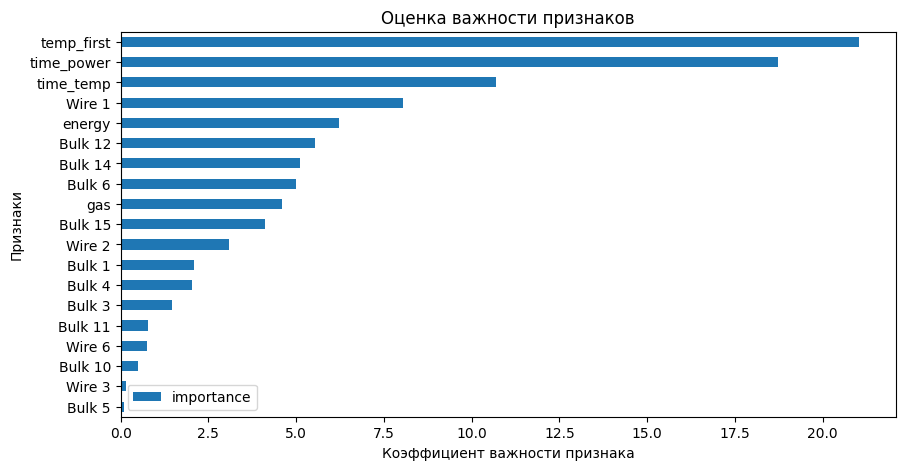

In [178]:
feature_results_imp.sort_values('importance', ascending = True).plot(kind = 'barh', 
                                                                     figsize = (10, 5), legend = True, fontsize = 10)
plt.title('Оценка важности признаков')
plt.xlabel('Коэффициент важности признака')
plt.ylabel('Признаки');

**Вывод оценки важности признаков:**

- исследовали признаки лучшей модели CatBoostRegressor на важность каждого из них, насколько каждый влияет на конечную температуру ковша
- **самым важным признаком** является начальная температура нагрева стали **temp_first**
- в **TOP 10 по важности** вошли следующие признаки (в порядке убывания важности, степени влияния):
  - temp_first начальная температура нагрева
  - time_power время нагрева дугой электрода
  - time_temp время между начальной и финальной температурой
  - Wire_1 объем проволочного материала 1
  - energy энергия потреблённая при процессе сплава стали 
  - Bulk_12 объем сыпучего материала 12
  - Bulk_14 объем сыпучего материала 14
  - Bulk_6 объем сыпучего материала 6
  - gas объем подаваемого для продувки стали газа
  - Bulk_15 объем сыпучего материала 15
- **TOP 5 самых невостребованных признаков** (в порядке степени ненужности):
  - Bulk_5 объем сыпучего материала 5
  - Wire_3 объем проволочного материала 3
  - Bulk_10 объем сыпучего материала 10
  - Wire_6 объем проволочного материала 6
  - Bulk_11 объем сыпучего материала 11

In [179]:
# посмотрим как пройдет обучение лучшей модели на самых важных признаках (возьмем TOP 10 наиболее важных признака)
features_train_best = features_train.drop(['Wire 2', 'Bulk 1', 'Bulk 4', 'Bulk 3',
                                           'Bulk 11', 'Wire 6', 'Bulk 10', 'Wire 3', 'Bulk 5'],  axis=1)
features_train_best.head()

temp_first  time_temp  time_power      energy  Bulk 6  Bulk 12  Bulk 14  \
key                                                                             
628       1585.0       1663   18.150000  288.585466   234.0    204.0    100.0   
498       1588.0       2790   17.066667  246.543227     0.0    408.0    257.0   
206       1586.0       1322    6.183333  119.450902     0.0    105.0    205.0   
2163      1611.0       2440    4.850000   85.897311     0.0      0.0      0.0   
249       1637.0       3286    4.700000   72.067884     0.0      0.0      0.0   

      Bulk 15      Wire 1        gas  
key                                   
628     203.0   54.100800  15.969264  
498     206.0   73.288795  17.980861  
206     103.0  127.458237   7.780773  
2163      0.0   75.042236   6.959038  
249       0.0  102.648004   9.979713

In [180]:
features_test_best = features_test.drop(['Wire 2', 'Bulk 1', 'Bulk 4', 'Bulk 3',
                                           'Bulk 11', 'Wire 6', 'Bulk 10', 'Wire 3', 'Bulk 5'],  axis=1)
features_test_best.head()

temp_first  time_temp  time_power      energy  Bulk 6  Bulk 12  Bulk 14  \
key                                                                             
1892      1608.0       3213   12.750000  148.766427     0.0    205.0    202.0   
482       1593.0       4719   25.566667  377.844409     0.0    460.0    237.0   
807       1591.0       2338   19.133333  250.326169     0.0    107.0    149.0   
11        1616.0       2836   10.450000  121.638247     0.0    207.0    101.0   
2071      1601.0       1266    7.916667  109.792903     0.0      0.0    149.0   

      Bulk 15      Wire 1        gas  
key                                   
1892    104.0  104.972397  18.688388  
482     223.0  132.350400  21.920936  
807     150.0  127.295998   1.879419  
11      202.0   99.197281   3.639128  
2071      0.0   16.074240   6.989050

In [181]:
%%time

model_cat_best = CatBoostRegressor(depth=4, learning_rate=.1, random_state=RANDOM_STATE, verbose=True) 
model_cat_best.fit(features_train_best, target_train)
# подставила лучшие параметры и наиболее важные признаки

0:	learn: 10.8856281	total: 1.15ms	remaining: 1.15s
1:	learn: 10.6800946	total: 2.27ms	remaining: 1.13s
2:	learn: 10.4640661	total: 3.22ms	remaining: 1.07s
3:	learn: 10.2616472	total: 4.1ms	remaining: 1.02s
4:	learn: 10.1427923	total: 5.04ms	remaining: 1s
5:	learn: 9.9997419	total: 5.95ms	remaining: 986ms
6:	learn: 9.8918486	total: 6.84ms	remaining: 971ms
7:	learn: 9.7613703	total: 7.78ms	remaining: 965ms
8:	learn: 9.6674934	total: 8.64ms	remaining: 951ms
9:	learn: 9.5519721	total: 9.57ms	remaining: 948ms
10:	learn: 9.4634916	total: 10.5ms	remaining: 944ms
11:	learn: 9.4034387	total: 11.5ms	remaining: 945ms
12:	learn: 9.3297127	total: 12.5ms	remaining: 946ms
13:	learn: 9.2516928	total: 13.3ms	remaining: 939ms
14:	learn: 9.1884524	total: 14.2ms	remaining: 933ms
15:	learn: 9.1294566	total: 15.1ms	remaining: 931ms
16:	learn: 9.0553320	total: 16ms	remaining: 928ms
17:	learn: 8.9935770	total: 16.9ms	remaining: 922ms
18:	learn: 8.9371600	total: 17.7ms	remaining: 916ms
19:	learn: 8.8880375	to

In [182]:
cat_best_prediction = model_cat_best.predict(features_test_best)

In [183]:
mae_cat_best = mae(target_test, cat_best_prediction)
print('MAE модели CatBoost на самых важных признаках:', mae_cat_best)

MAE модели CatBoost на самых важных признаках: 6.269151087391865


### Выводы по разделу Построение и обучение моделей

1. Подготовка данных к ML:
- проведено разделение датасета на выборки – обучающую и тестовую в размерах 1/3
- проведено масштабирование признаков (это необходимо для обучения модели линейной регрессии)
- определены признаки и целевой признак (финальная температура)
- один из двух сильноскоррелированных признаков (сгенерированных в процессе обработки) – удален time_power (время нагрева дугой электрода), второй energy (потребленная энергия), оставили как наиболее важный
- метрикой оценки ошибки выбрана  MAE, необходимо получить значение меньше 6.8, используем random_state=190623
2. Построение и обучение моделей:
- использовались четыре модели: 
  - линейной регрессии LinearRegression – на масштабированных признаках, оценка модели с помощью кросс-валидации
  - случайного леса RandomForestRegressor 
  - градиентного бустинга CatBoostRegressor
  - градиентного бустинга LGBMRegressor
Все, кроме линейной регресии - с подбором гиперпараметров, используя GridSearchCV
3. Анализ моделей показал лучшей моделью **CatBoostRegressor** с параметрами:
   - глубина 'depth': 4 
   - шаг 'learning_rate': 0.1
   - **MAE лучшей модели 5,87**
4. Лучшая модель при проверке на адекватность показала MAE лучше, чем у константной модели, 5,87/8,05 соответственно
5. **На тестовой выборке MAE лучшей модели CatBoostRegressor - 6,049**
6. Исследованы признаки лучшей модели по степени их важности  для обучения. Выяснилось, **самым важным признаком** является начальная температура нагрева стали **temp_first** (подробно важность признаков расписана в разделе по исследованию важности признаков)
7. Лучшую модель обучили на самых важных признаках (оставили TOP 10, остальные удалили). MAE такой модели показало значение 6,269, больше, чем у лучшей модели на всех признаках.

Можно сделать вывод, что признаки для обучения лучшей модели лучше оставить в наиболее полном наборе, 6 удаленных признака по сыпучим материалам и 3 по проволоке тоже оказывают влияние на предсказание финальной температуры, и если убирать ненужные признаки, то в меньшем процентном отношении к общим признакам. Если встанет вопрос о подборе признаков для лучшего моделирования, можно этим заняться отдельно.

## Итоговый отчет

### I.	Сравнение решения и плана.

Проект выполнен в соответствии с планом:

Проведен первичный анализ данных - выгрузка и изучение данных, графический анализ, поиск аномалий.

Кол-во партий, используемых в каждом датасете от 1 до 3241, но кол-во разное (не все партии подряд включены, каких-то просто нет)
- в данных **об электродах** 14876 записей с 3214 партиями, с 1 по 3241: 
  - дубликатов и пропусков нет
  - есть выброс в виде отрицательного значения Реактивной мощности (значение -715.479924), номер партии, где встретилось ошибочное отрицательное значение: key 2116, в партии всего 20 измерений
  - распределение значений обоих мощностей (без учета выбросов) выглядит нормальным
  - наблюдается по несколько строк на один и тот же ключ, каждая такая строка отражает запись очередного (по времени) измерения температуры в данной партии.
- в файле по **объему подачи сыпучих материалов** мы наблюдаем 15 видов используемых материалов:
  - дубликатов строк нет
  - значения key в данном датасете уникальны, это говорит о том, что в каждой партии используется один материал
  - есть много пропусков, которые могут обозначать то, что в данной партии конкретный материал не используется, 
  - в некоторых столбцах (материалах) встречаются единичные значения – можно сделать вывод, что эти материалы крайне редко используются и не так нужны
- данные **о сыпучих материалах (время)**:
  - дубликатов нет
  - на каждый замер (время) значение партии key также уникально, соответствует кол-ву подач материалов
  - много пропусков, связано аналогично файлу bulk (объем материалов) с тем, что каждый раз использовались разные материалы
  - аналогично данным о сыпучих материалах (объем) есть значения bulk, в которых указано время, с очень небольшим кол-вом строк.
- данные **о продувке газом**:
  - дубликатов и пропусков нет
  - партия/ключ - уникальна для каждой подачи газа
- в датасете с результатами **измерения температуры** 18092 записей:
  - дубликатов нет
  - данные о температуре – датасет с ключевой информацией, включающий признак (начальную температуру) и целевой признак (финальную температуру)
  - 3427 пропусков есть в значениях Температура. Партии, в которых есть пропущенные значения, 739
  - распределение значений Температуры нормальное
  - значения температуры ниже 1450 - ошибочны, всего записей с ошибочной температурой (ниже температуры плавления стали) 76, это составляет 0,42% от общего кол-ва записей
   - по некоторым ключам есть только один замер, это тоже аномалия, недопустимо
- данные **о проволочных материалах**:
  - всего использовалось 9 видов проволоки
  - пропуски - аналогично сыпучим материалам означают, что не использовался в конкретной партии именно этот проволочный материал
- данные **о проволочных материалах (время)**:
  - кол-во ключей/партий 3081 при нумерации всех партий от 1 до 3241
 - дубликатов нет
 
Данные по времени добавления сыпучих материалов и времени добавления проволоки не дают большой информативности, не берем эти датасеты в дальнейший анализ.

### II.	Проведена предобработка данных (работа с пропусками, типами данных, удаление аномалий, генерация новых признаков, агрегирование по ключу key):

Предобработка проведена для всех датафреймов, кроме данных о времени (сыпучих материалов и проволоки)
- названия колонок приведены к общему стилю
- тип данных о времени переведен в datetime
- в **данных об электродах** удалена партия с выбросом отрицательного значения Реактивной мощности – 2116
- в **данных о подаче сыпучих материалов**:
  - пропуски значений объема материалов заменены на нули
  - столбцы (материалы), кол-во строк в которых меньше 30 (1% от всего кол-ва) – удалили
  - графически представлена статистика расхода каждого сыпучего материала
  - для анализа кроме ключа key, как признаки оставили найденные величины - Энергия energy и Время нагрева дугой time_power, остальные не взяли в дальнейший анализ
- в **данных о продувке сплава газом** – ничего не меняли
- в **данных о температуре** удалили следующие партии:
    - в которых есть пропущенные значения измерения температуры
    - в которых температура ниже 1450
    - в которых есть только один замер 
  - оставили в данных о температуре только первую и последнюю температуру (остальные для анализа не нужны) группировкой и функцией агрегирования с помощью first и last
  - оставили в датафрейме о температуре найденные значение первой и конечной температуры нагрева, убрали первое и последнее значение времени time_first и time_last
- в **данных о проволочных материалах (объем)**:
  - пропуски значений объема проволоки заменили на нули
  - столбцы Wire (виды проволоки), где заполненные значения встречаются менее чем в 30 строках - удалили 
  - графически представлена статистика расхода каждого вида проволоки
  - **сгенерированы новые данные**:
    - **time_power** время нагрева дугой , выраженное в минутах ( в данных об электродах)
    - **energy** потребление/расход энергии , в киловатт в час (кВт/час), используя найденную полную мощность s как корень из суммы квадратов обеих мощностей (Активной и Реактивной)
    - **time_temp** разница между точками замера температур - начальным и конечным временем (в данных о температуре)
- **создан новый датафрейм по ключу key**, присоединяя все столбцы к основному датафрейму - данных о температуре

В итоговую таблицу вошли:
- всего 2324 строки, столько же ключей/партий
- время первого и последнего замера температуры заменили на одно значение - времени нагрева
- значения первого и последнего замера температуры будут использоваться как признак и целевой признак
- по электродам остается один признак - потреблённая энергия
- из материалов, подаваемых в сплав осталось 10 видов
- проволоки - 4 вида
- по газу - значения объемов на каждую партию

**Проведен анализ объединенного датафрейма**, графически представлено распределение каждого признака.

Исследована взаимная корреляция всех признаков, показана тепловая карта корреляции, также - зависимость признаков от целевой переменной (финальной температурой):
- замечена более сильная зависимость между некоторыми сыпучими материалами bulk и проволочными материалами wire, и между собой (корреляция больше 0,2)
- наиболее сильная зависимость - между начальной температурой нагрева стали электродом time_first и временем нагрева time_power, также (чуть меньше, но больше других) - между начальной температурой нагрева time_first и потребляемой энергией energy
**Самая сильная корреляция (0,9)** наблюдается между временем нагрева дугой time_power и потреблённой энергией energy.

### III.	Проведена работа по построению модели:

По результату исследовательского анализа пришли к выводу, что используем задачу регрессии, в качестве оценки качества модели применим MAE (mean_absolute_error, средняя абсолютная ошибка), стремились получить значение меньше 6.8.
random_state=190623

**Признаки**, используемые для обучения:
- time_first - начальная температура нагрева стали 
- time_temp - разница между точками замера температур - начальным и конечным временем  
- time_power  - время нагрева дугой 
- energy - потребленная в процесе нагрева дугой энергия
- Bulk 1, Bulk 3, Bulk 4, Bulk 5, Bulk 6, Bulk 10 , Bulk 11, Bulk 12, Bulk 14, Bulk 15 - объемы 10 видов сыпучих материалов 
- Wire 1, Wire 2,  Wire 3,  Wire 6 - объемы 4 видов проволоки 
- gas - объем подаваемого для продувки газа

**Целевой признак**: 
- temp_last - финальное значение температуры нагрева стали

#### Разделение на выборки для обучения и тестирования:
- определили признаки и целевой признак
- разделили на выборки train и test в соотношении 3/1
- проведено масштабирование признаков (для модели линейной регрессии) в обучающей и тестовой выборках
- создана функция подсчета MAE

#### Проведено построение и обучение моделей:
  - **Линейной регрессии LinearRegression**:
    - на масштабированных признаках
    - с использованием кросс-валидации
    - из-за  сильной корреляции между временем нагрева дугой time_power и потреблённой энергией energy для обучения линейной регрессии удалили признак time_power, оставив более важный признак потреблённой энергии energy – в обеих выборках, и обучающей, и тестовой.
    - MAE = 6.54
  - **Случайного леса RandomForestRegressor**:
     - на немасштабированных признаках
     - с автоматическим подбором гиперпараметров с использованием GridSearchCV
     - лучшие параметры модели Случайного леса: глубина max_depth=15, минимальное количество образцов в листовом узле каждого дерева  min_samples_leaf=2, минимальное количество образцов для разбиения внутреннего узла каждого дерева  min_samples_split=2, количество деревьев решений в лесу n_estimators=200,   random_state=190623
     - MAE = 6.08
- Модели градиентного бустинга

  - **CatBoostRegressor**:
   - на немасштабированных признаках
   - с автоматическим подбором гиперпараметров с использованием GridSearchCV
   - лучшие параметры CatBoostRegressor:  глубина depth=4,  шаг обучения learning_rate=0.1, random_state=190623, verbose=True
   - MAE = 5.87
  - **LGBMRegressor**:
   - на немасштабированных признаках
   - с автоматическим подбором гиперпараметров с использованием GridSearchCV
   - лучшие параметры LGBMRegressor: learning_rate': 0.1, 'num_leaves': 25, 'random_state': 190623
   - MAE = 5.96
                
#### Проведен анализ всех обученных моделей:

Лучшей моделью показала себя модель градиентного бустинга **CatBoostRegressor** с наименьшей **MAE = 5,87**

Параметры лучшей модели: глубина 'depth': 4, шаг 'learning_rate': 0.1

##### Проведено тестирование лучшей модели на тестовой выборке:

На тестовой выборке MAE лучшей модели CatBoostRegressor - 6,049

##### Проведена проверка лучшей модели на адекватность – сравнение с константной моделью 
:
Средние итоговые ошибки качества константной модели и нашей лучшей модели CatBoostRegressor:: 8.05/5,87

Качество нашей лучшей модели выше качества модели сравнения

Вывод - наша лучшая модель прошла проверку на адекватность.

##### Проведено исследование важности признаков лучшей обученной модели:

- **самым важным признаком** является начальная температура нагрева стали **temp_first**

Провели эксперимент - обучили лучшую модель на самых важных признаках (взяли в обучение только TOP 10 по важности признаков). MAE лучшей модели на TOP 10 важных признаках показало значение 6,269, больше, чем у лучшей модели на всех признаках. 

Вывод – оставить для обучения все выбранные в объединенном датафрейме признаки, или, если будет необходимость, провести подбор признаков, удаляя самые ненужные (по 1-2)

### Трудности проекта:

- невысокое качество исходных данных
- разное кол-во и порядок партий, включенное в каждый датафрейм
- много пропусков
- аномальные данные
- коректировка данных для признаков (удаление некоторых, генерация новых)
- при создании объединенного датафрейма получение гораздо меньшего кол-ва строк, чем в исходных данных (из-за этого может страдать качество обучения моделей)
- наличие сильно скоррелированных признаков, из которых некоторые пришлось удалить/

### Ключевые шаги решения:

- Исследовательский анализ и Предобработка
- Разработка, построение и обучение моделей
- Анализ лучшей модели и итогового датафрейма

### Итоговый вывод:

Лучшей моделью, наиболее качественно предсказывающей финальную температуру нагрева стали в ковше для плавления стали стала **модель градиентного бустинга CatBoostRegressor**, показав среднюю абсолютную ошибку **MAE=5.87**, на тестовой выборке MAE=6.049

Cамым важным признаком является начальная температура нагрева стали temp_first 